In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (classification_report, confusion_matrix,
                             f1_score, accuracy_score, cohen_kappa_score)
from sklearn.utils.class_weight import compute_class_weight, compute_sample_weight
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    cohen_kappa_score,
    classification_report
)

import warnings
warnings.filterwarnings('ignore')


Dataset Creation and Authorship

Creation Details

Dataset Name:Climate & Energy Consumption Dataset 2020-2024  

Original Filename: `global_climate_energy_2020_2024.csv`  

Creator: Emirhan Akku  

Platform: Kaggle  

Publication Date: November 10, 2024  

URL: https://www.kaggle.com/datasets/emirhanakkuclimate-and-energy-consumption-dataset-20202024

Dataset Type

Classification: Synthetic/Simulated Dataset

This is a realistic synthetic dataset that combines:

- Weather and climate patterns based on historical averages
- Energy consumption trends derived from real-world data
- CO2 emission estimates correlated with energy use
- Renewable energy penetration reflecting actual country profiles
- Socio-economic indicators (urbanization, industrial activity)

Primary SDG Alignment

This dataset directly supports three interconnected UN Sustainable Development Goals adopted in 2015 as part of the 2030 Agenda for Sustainable Development:
SDG 7: Affordable and Clean Energy
Goal Statement: "Ensure access to affordable, reliable, sustainable and modern energy for all"

Cross-country comparison identifies technology leaders (Sweden, Norway) and knowledge transfer opportunities
Enables identification of countries needing technical assistance

SDG 13: Climate Action
Goal Statement:
"Take urgent action to combat climate change and its impacts"
Specific Targets Supported:
Target 13.2: Integrate climate change measures into national policies, strategies and planning

SDG 11: Sustainable Cities and Communities
Goal Statement: "Make cities and human settlements inclusive, safe, resilient and sustainable"
Specific Targets Supported:
Target 11.6: By 2030, reduce the adverse per capita environmental impact of cities, including air quality and waste management

1.date

Type: DateTime (object in CSV, converted to datetime64)

Format: YYYY-MM-DD (e.g., "2020-01-01")

Range: January 1, 2020 to December 31, 2024

Total Unique Values: 1,827 days (365 days × 5 years + 2 leap days)

2.country: 20 countires of different continents

3.avg_temperature: Temperature in average range

4.humidity: Humidity measure in the country

5.co2_emission: rate of co2 gas emission in the country

6.energy_consumption: mwh represenation of energy comsumed in the country

7.renewable_share: renewable Share

8.urban_population: Precenatge measure of population

9.industrial_activity_index: Ranking of industrail activity (Dimensionless)

10.energy_price: Indexing of the price ranges of the energy

Potential Questions to be consulted with in the dataset

How has energy consumption changed over time (2020 – 2024) in relation to key climate variables?

What is the relationship between climate factors (e.g., temperature, rainfall) and different types or levels of energy use?

The dataset consists of exceptional quality with no missing values, strong relevance, very negligible imabalance and minimal noise.

Commencement of Exploratory Data Analysis

In [3]:
df_raw = pd.read_csv("/content/drive/MyDrive/ConceptAndTechnologiesOfAI/Classification_Dataset/global_climate_energy_2020_2024.csv")

In [4]:
df = df_raw.copy()

In [5]:
print(f"Dataset Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")

Dataset Shape: 36,540 rows × 10 columns


In [6]:
print(f"\nColumn Names and Types:")
print(df.dtypes)


Column Names and Types:
date                          object
country                       object
avg_temperature              float64
humidity                     float64
co2_emission                 float64
energy_consumption           float64
renewable_share              float64
urban_population             float64
industrial_activity_index    float64
energy_price                 float64
dtype: object


In [7]:
df.head()

,date,country,avg_temperature,humidity,co2_emission,energy_consumption,renewable_share,urban_population,industrial_activity_index,energy_price
0,2020-01-01,Germany,28.29,31.08,212.63,11348.75,14.42,76.39,51.22,83.93
1,2020-01-02,Germany,28.38,37.94,606.05,4166.64,5.63,86.26,78.27,110.40
2,2020-01-03,Germany,28.74,57.67,268.72,4503.80,14.20,75.92,48.96,173.58
3,2020-01-04,Germany,26.66,51.34,167.32,3259.13,13.84,63.15,97.42,89.13
4,2020-01-05,Germany,26.81,65.38,393.89,7023.72,6.93,76.02,81.89,40.60


In [8]:
print("2. DATA QUALITY ASSESSMENT")

# Missing values
missing_data = pd.DataFrame({
    'Missing_Count': df.isnull().sum(),
    'Missing_Percentage': (df.isnull().sum() / len(df) * 100).round(2)
})
missing_data = missing_data[missing_data['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)

if len(missing_data) > 0:
    print("Missing Values Detected:")
    print(missing_data)
else:
    print("No missing values detected in the dataset")

2. DATA QUALITY ASSESSMENT
No missing values detected in the dataset


In [9]:
# Duplicate rows
duplicates = df.duplicated().sum()
print(f"\nDuplicate Rows: {duplicates:,} ({duplicates/len(df)*100:.2f}%)")


Duplicate Rows: 0 (0.00%)


In [10]:
# Data types
print(f"\nData Type Distribution:")
print(df.dtypes.value_counts())
print("\n")


Data Type Distribution:
float64    8
object     2
Name: count, dtype: int64




In [11]:
# Drop rows where 'country' is missing
df_clean = df.dropna(subset=['country'])


In [12]:
print(df_clean.head())
print(df_clean.isnull().sum())


         date  country  avg_temperature  humidity  co2_emission  \
0  2020-01-01  Germany            28.29     31.08        212.63   
1  2020-01-02  Germany            28.38     37.94        606.05   
2  2020-01-03  Germany            28.74     57.67        268.72   
3  2020-01-04  Germany            26.66     51.34        167.32   
4  2020-01-05  Germany            26.81     65.38        393.89   

   energy_consumption  renewable_share  urban_population  \
0            11348.75            14.42             76.39   
1             4166.64             5.63             86.26   
2             4503.80            14.20             75.92   
3             3259.13            13.84             63.15   
4             7023.72             6.93             76.02   

   industrial_activity_index  energy_price  
0                      51.22         83.93  
1                      78.27        110.40  
2                      48.96        173.58  
3                      97.42         89.13  
4          

In [13]:
print("3. TEMPORAL ANALYSIS")

df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['quarter'] = df['date'].dt.quarter
df['day_of_year'] = df['date'].dt.dayofyear

print(f"Date Range: {df['date'].min()} to {df['date'].max()}")
print(f"Total Days Covered: {(df['date'].max() - df['date'].min()).days:,} days")
print(f"\nRecords per Year:")
print(df['year'].value_counts().sort_index())
print("\n")

3. TEMPORAL ANALYSIS
Date Range: 2020-01-01 00:00:00 to 2024-12-31 00:00:00
Total Days Covered: 1,826 days

Records per Year:
year
2020    7320
2021    7300
2022    7300
2023    7300
2024    7320
Name: count, dtype: int64




In [14]:
df.head()

,date,country,avg_temperature,humidity,co2_emission,energy_consumption,renewable_share,urban_population,industrial_activity_index,energy_price,year,month,quarter,day_of_year
0,2020-01-01,Germany,28.29,31.08,212.63,11348.75,14.42,76.39,51.22,83.93,2020,1,1,1
1,2020-01-02,Germany,28.38,37.94,606.05,4166.64,5.63,86.26,78.27,110.40,2020,1,1,2
2,2020-01-03,Germany,28.74,57.67,268.72,4503.80,14.20,75.92,48.96,173.58,2020,1,1,3
3,2020-01-04,Germany,26.66,51.34,167.32,3259.13,13.84,63.15,97.42,89.13,2020,1,1,4
4,2020-01-05,Germany,26.81,65.38,393.89,7023.72,6.93,76.02,81.89,40.60,2020,1,1,5


In [15]:
print("4. GEOGRAPHICAL COVERAGE")
countries = df['country'].nunique()
print(f"Total Countries: {countries}")
print(f"\nCountries in Dataset:")
print(df['country'].unique())


4. GEOGRAPHICAL COVERAGE
Total Countries: 20

Countries in Dataset:
['Germany' 'France' 'Netherlands' 'Italy' 'Spain' 'Sweden' 'Norway'
 'Poland' 'Turkey' 'United Kingdom' 'United States' 'Canada' 'Brazil'
 'India' 'China' 'Japan' 'Australia' 'South Africa' 'Mexico' 'Indonesia']


In [16]:
records_per_country = df['country'].value_counts()
print(f"\nRecords per Country:")
print(records_per_country)
print(f"\nMean records per country: {records_per_country.mean():.0f}")
print(f"Median records per country: {records_per_country.median():.0f}")
print("\n")


Records per Country:
country
Germany           1827
France            1827
Netherlands       1827
Italy             1827
Spain             1827
Sweden            1827
Norway            1827
Poland            1827
Turkey            1827
United Kingdom    1827
United States     1827
Canada            1827
Brazil            1827
India             1827
China             1827
Japan             1827
Australia         1827
South Africa      1827
Mexico            1827
Indonesia         1827
Name: count, dtype: int64

Mean records per country: 1827
Median records per country: 1827




In [17]:
print("5. DESCRIPTIVE STATISTICS - ALL NUMERICAL FEATURES")

numerical_cols = ['avg_temperature', 'humidity', 'co2_emission', 'energy_consumption',
                  'renewable_share', 'urban_population', 'industrial_activity_index', 'energy_price']

desc_stats = df[numerical_cols].describe()
print(desc_stats.round(2))

5. DESCRIPTIVE STATISTICS - ALL NUMERICAL FEATURES
       avg_temperature  humidity  co2_emission  energy_consumption  \
count         36540.00  36540.00      36540.00            36540.00   
mean             13.58     59.97        445.82             7295.90   
std              10.08     17.30        234.36             3693.93   
min              -9.60     30.00         50.15             1001.89   
25%               5.63     45.01        248.68             4184.18   
50%              13.79     59.99        422.66             6921.62   
75%              20.84     74.97        628.42            10175.11   
max              38.71     90.00        999.85            15998.05   

       renewable_share  urban_population  industrial_activity_index  \
count         36540.00          36540.00                   36540.00   
mean             15.94             74.98                      70.17   
std               5.33              8.65                      17.33   
min               5.00            

In [18]:
# Additional statistics
print("Additional Statistical Measures:")
additional_stats = pd.DataFrame({
    'Skewness': df[numerical_cols].skew(),
    'Variance': df[numerical_cols].var(),
    'Coef_Variation': (df[numerical_cols].std() / df[numerical_cols].mean() * 100)
})
print(additional_stats.round(2))
print("\n")

Additional Statistical Measures:
                           Skewness     Variance  Coef_Variation
avg_temperature                0.07       101.55           74.20
humidity                       0.00       299.40           28.85
co2_emission                   0.32     54925.03           52.57
energy_consumption             0.33  13645107.80           50.63
renewable_share                0.16        28.46           33.46
urban_population               0.00        74.74           11.53
industrial_activity_index     -0.00       300.50           24.70
energy_price                  -0.00      2418.51           42.66




In [19]:
print("6. FEATURE-SPECIFIC ANALYSIS (SDG 7, 13, 11)")

# SDG 7: Affordable and Clean Energy
print("\nSDG 7: Affordable and Clean Energy Metrics")
print("-" * 60)
print(f"Renewable Share:")
print(f"  Mean: {df['renewable_share'].mean():.2f}%")
print(f"  Median: {df['renewable_share'].median():.2f}%")
print(f"  Range: {df['renewable_share'].min():.2f}% - {df['renewable_share'].max():.2f}%")
print(f"  Countries with >20% renewable share: {(df.groupby('country')['renewable_share'].mean() > 20).sum()}")

print(f"\nEnergy Consumption:")
print(f"  Mean: {df['energy_consumption'].mean():.2f}")
print(f"  Median: {df['energy_consumption'].median():.2f}")
print(f"  Total Energy Consumed: {df['energy_consumption'].sum():,.0f}")

print(f"\nEnergy Price:")
print(f"  Mean: {df['energy_price'].mean():.2f}")
print(f"  Volatility (Std Dev): {df['energy_price'].std():.2f}")

6. FEATURE-SPECIFIC ANALYSIS (SDG 7, 13, 11)

SDG 7: Affordable and Clean Energy Metrics
------------------------------------------------------------
Renewable Share:
  Mean: 15.94%
  Median: 15.71%
  Range: 5.00% - 30.87%
  Countries with >20% renewable share: 0

Energy Consumption:
  Mean: 7295.90
  Median: 6921.62
  Total Energy Consumed: 266,592,363

Energy Price:
  Mean: 115.28
  Volatility (Std Dev): 49.18


In [20]:
# SDG 13: Climate Action
print("\nSDG 13: Climate Action Metrics")
print(f"CO2 Emissions:")
print(f"  Mean: {df['co2_emission'].mean():.2f}")
print(f"  Median: {df['co2_emission'].median():.2f}")
print(f"  Total CO2 Emitted: {df['co2_emission'].sum():,.0f}")
print(f"  High emission days (>500): {(df['co2_emission'] > 500).sum():,} ({(df['co2_emission'] > 500).sum()/len(df)*100:.2f}%)")

print(f"\nTemperature:")
print(f"  Mean: {df['avg_temperature'].mean():.2f}°C")
print(f"  Range: {df['avg_temperature'].min():.2f}°C - {df['avg_temperature'].max():.2f}°C")


SDG 13: Climate Action Metrics
CO2 Emissions:
  Mean: 445.82
  Median: 422.65
  Total CO2 Emitted: 16,290,279
  High emission days (>500): 14,156 (38.74%)

Temperature:
  Mean: 13.58°C
  Range: -9.60°C - 38.71°C


In [21]:
# SDG 11: Sustainable Cities and Communities
print("\n SDG 11: Sustainable Cities and Communities Metrics")
print(f"Urban Population:")
print(f"  Mean: {df['urban_population'].mean():.2f}%")
print(f"  Highly urbanized (>80%): {(df['urban_population'] > 80).sum():,} records")

print(f"\nIndustrial Activity Index:")
print(f"  Mean: {df['industrial_activity_index'].mean():.2f}")
print(f"  High activity (>80): {(df['industrial_activity_index'] > 80).sum():,} records")
print("\n")



 SDG 11: Sustainable Cities and Communities Metrics
Urban Population:
  Mean: 74.98%
  Highly urbanized (>80%): 12,111 records

Industrial Activity Index:
  Mean: 70.17
  High activity (>80): 12,320 records




In [22]:
df.head()

,date,country,avg_temperature,humidity,co2_emission,energy_consumption,renewable_share,urban_population,industrial_activity_index,energy_price,year,month,quarter,day_of_year
0,2020-01-01,Germany,28.29,31.08,212.63,11348.75,14.42,76.39,51.22,83.93,2020,1,1,1
1,2020-01-02,Germany,28.38,37.94,606.05,4166.64,5.63,86.26,78.27,110.40,2020,1,1,2
2,2020-01-03,Germany,28.74,57.67,268.72,4503.80,14.20,75.92,48.96,173.58,2020,1,1,3
3,2020-01-04,Germany,26.66,51.34,167.32,3259.13,13.84,63.15,97.42,89.13,2020,1,1,4
4,2020-01-05,Germany,26.81,65.38,393.89,7023.72,6.93,76.02,81.89,40.60,2020,1,1,5


In [23]:
print("7. CORRELATION ANALYSIS")

correlation_matrix = df[numerical_cols].corr()
print("Correlation Matrix:")
print(correlation_matrix.round(3))

# Strong correlations (|r| > 0.5)
print("\nStrong Correlations (|r| > 0.5):")
strong_corr = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.5:
            strong_corr.append({
                'Feature 1': correlation_matrix.columns[i],
                'Feature 2': correlation_matrix.columns[j],
                'Correlation': correlation_matrix.iloc[i, j]
            })

if strong_corr:
    strong_corr_df = pd.DataFrame(strong_corr).sort_values('Correlation', key=abs, ascending=False)
    print(strong_corr_df.to_string(index=False))
else:
    print("No strong correlations detected")
print("\n")


7. CORRELATION ANALYSIS
Correlation Matrix:
                           avg_temperature  humidity  co2_emission  \
avg_temperature                      1.000     0.005         0.005   
humidity                             0.005     1.000         0.001   
co2_emission                         0.005     0.001         1.000   
energy_consumption                  -0.007     0.003         0.172   
renewable_share                     -0.003     0.008        -0.002   
urban_population                     0.002     0.001        -0.003   
industrial_activity_index           -0.000    -0.008         0.002   
energy_price                         0.000    -0.000         0.004   

                           energy_consumption  renewable_share  \
avg_temperature                        -0.007           -0.003   
humidity                                0.003            0.008   
co2_emission                            0.172           -0.002   
energy_consumption                      1.000           -0.00

In [24]:
print("8. COUNTRY-LEVEL AGGREGATED METRICS")

country_metrics = df.groupby('country').agg({
    'co2_emission': 'mean',
    'energy_consumption': 'mean',
    'renewable_share': 'mean',
    'urban_population': 'mean',
    'industrial_activity_index': 'mean',
    'energy_price': 'mean',
    'avg_temperature': 'mean'
}).round(2)

country_metrics.columns = ['Avg_CO2', 'Avg_Energy_Consumption', 'Avg_Renewable_Share',
                           'Avg_Urban_Pop', 'Avg_Industrial_Activity', 'Avg_Energy_Price',
                           'Avg_Temperature']

country_metrics


8. COUNTRY-LEVEL AGGREGATED METRICS


,Avg_CO2,Avg_Energy_Consumption,Avg_Renewable_Share,Avg_Urban_Pop,Avg_Industrial_Activity,Avg_Energy_Price,Avg_Temperature
country,,,,,,,
Australia,454.39,7239.90,15.97,75.14,70.48,113.75,23.38
Brazil,440.88,7308.89,15.96,75.32,69.47,115.90,10.50
Canada,445.32,7220.40,16.03,75.34,70.45,115.08,16.42
China,448.99,7307.75,15.87,75.08,70.07,115.99,15.80
France,448.68,7301.72,15.97,75.13,70.37,114.94,10.39
Germany,449.45,7435.52,15.96,74.93,70.01,115.90,22.44
India,445.74,7352.73,15.98,75.08,70.40,116.90,5.23
Indonesia,437.79,7401.16,15.91,75.10,70.60,114.00,10.86
Italy,442.61,7204.33,15.93,75.20,70.45,114.50,20.50


In [25]:
print("9. SUSTAINABILITY CLASSIFICATION - TARGET VARIABLE CREATION")

# Function to calculate both score and level
def calculate_sustainability(row):
    score = 0

    # Renewable share scoring
    if row['renewable_share'] >= 15:
        score += 3
    elif row['renewable_share'] >= 10:
        score += 2
    elif row['renewable_share'] >= 5:
        score += 1

    # CO2 emissions scoring (lower is better)
    if row['co2_emission'] < 200:
        score += 3
    elif row['co2_emission'] < 400:
        score += 2
    elif row['co2_emission'] < 600:
        score += 1

    # Energy consumption scoring (moderate preferred)
    if row['energy_consumption'] < 5000:
        score += 3
    elif row['energy_consumption'] < 8000:
        score += 2
    elif row['energy_consumption'] < 10000:
        score += 1

    # Determine level based on score
    if score >= 7:
        level = 'High'
    elif score >= 4:
        level = 'Medium'
    else:
        level = 'Low'

    return pd.Series([score, level])

# Apply function and create two new columns
df[['sustainability_score', 'sustainability_level']] = df.apply(calculate_sustainability, axis=1)

print("Sustainability Score & Level Added:")
print(df[['country', 'sustainability_score', 'sustainability_level']].head())

print("\nLevel Distribution:")
print(df['sustainability_level'].value_counts())

print("\nPercentage Distribution:")
print((df['sustainability_level'].value_counts(normalize=True) * 100).round(2))


9. SUSTAINABILITY CLASSIFICATION - TARGET VARIABLE CREATION
Sustainability Score & Level Added:
   country  sustainability_score sustainability_level
0  Germany                     4               Medium
1  Germany                     4               Medium
2  Germany                     7                 High
3  Germany                     8                 High
4  Germany                     5               Medium

Level Distribution:
sustainability_level
Medium    19070
High      11175
Low        6295
Name: count, dtype: int64

Percentage Distribution:
sustainability_level
Medium    52.19
High      30.58
Low       17.23
Name: proportion, dtype: float64


In [26]:
print("\n\nSustainability Metrics by Level:")
sustainability_profile = df.groupby('sustainability_level')[numerical_cols].mean().round(2)
sustainability_profile



Sustainability Metrics by Level:


,avg_temperature,humidity,co2_emission,energy_consumption,renewable_share,urban_population,industrial_activity_index,energy_price
sustainability_level,,,,,,,,
High,13.56,59.90,259.30,4400.50,17.87,74.93,70.27,115.42
Low,13.44,59.85,681.60,11530.55,13.39,75.07,69.99,115.53
Medium,13.64,60.05,477.29,7594.75,15.66,74.98,70.18,115.11


In [27]:
df.head()

,date,country,avg_temperature,humidity,co2_emission,energy_consumption,renewable_share,urban_population,industrial_activity_index,energy_price,year,month,quarter,day_of_year,sustainability_score,sustainability_level
0,2020-01-01,Germany,28.29,31.08,212.63,11348.75,14.42,76.39,51.22,83.93,2020,1,1,1,4,Medium
1,2020-01-02,Germany,28.38,37.94,606.05,4166.64,5.63,86.26,78.27,110.40,2020,1,1,2,4,Medium
2,2020-01-03,Germany,28.74,57.67,268.72,4503.80,14.20,75.92,48.96,173.58,2020,1,1,3,7,High
3,2020-01-04,Germany,26.66,51.34,167.32,3259.13,13.84,63.15,97.42,89.13,2020,1,1,4,8,High
4,2020-01-05,Germany,26.81,65.38,393.89,7023.72,6.93,76.02,81.89,40.60,2020,1,1,5,5,Medium


In [28]:
print("\n\nCountries by Dominant Sustainability Level:")
country_sustainability = df.groupby(['country', 'sustainability_level']).size().unstack(fill_value=0)
dominant_level = country_sustainability.idxmax(axis=1)
dominant_level



Countries by Dominant Sustainability Level:


,0
country,
Australia,Medium
Brazil,Medium
Canada,Medium
China,Medium
France,Medium
Germany,Medium
India,Medium
Indonesia,Medium
Italy,Medium


In [29]:
print("10. OUTLIER DETECTION (IQR Method)")

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
    outlier_pct = (outliers / len(df) * 100)

    print(f"{col}:")
    print(f"  Outliers: {outliers:,} ({outlier_pct:.2f}%)")
    print(f"  Range: [{lower_bound:.2f}, {upper_bound:.2f}]")
print("\n")

10. OUTLIER DETECTION (IQR Method)
avg_temperature:
  Outliers: 0 (0.00%)
  Range: [-17.19, 43.66]
humidity:
  Outliers: 0 (0.00%)
  Range: [0.07, 119.91]
co2_emission:
  Outliers: 0 (0.00%)
  Range: [-320.95, 1198.04]
energy_consumption:
  Outliers: 0 (0.00%)
  Range: [-4802.22, 19161.51]
renewable_share:
  Outliers: 0 (0.00%)
  Range: [0.29, 31.57]
urban_population:
  Outliers: 0 (0.00%)
  Range: [44.92, 105.05]
industrial_activity_index:
  Outliers: 0 (0.00%)
  Range: [10.36, 130.20]
energy_price:
  Outliers: 0 (0.00%)
  Range: [-56.36, 287.05]




In [30]:
print("11. TEMPORAL TRENDS (YEARLY AVERAGES)")

yearly_trends = df.groupby('year')[numerical_cols].mean().round(2)
print(yearly_trends)

11. TEMPORAL TRENDS (YEARLY AVERAGES)
      avg_temperature  humidity  co2_emission  energy_consumption  \
year                                                                
2020            13.60     59.54        451.06             7322.55   
2021            13.58     59.90        439.41             7279.66   
2022            13.58     59.99        446.31             7278.26   
2023            13.55     60.21        445.25             7338.22   
2024            13.59     60.21        447.06             7260.85   

      renewable_share  urban_population  industrial_activity_index  \
year                                                                 
2020             9.97             75.07                      70.03   
2021            12.88             74.90                      70.17   
2022            15.92             75.05                      70.09   
2023            18.98             74.98                      70.40   
2024            21.96             74.91                   

In [31]:
print("Year-over-Year Changes (%):")
yoy_change = yearly_trends.pct_change() * 100
yoy_change.round(2)

Year-over-Year Changes (%):


,avg_temperature,humidity,co2_emission,energy_consumption,renewable_share,urban_population,industrial_activity_index,energy_price
year,,,,,,,,
2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021,-0.15,0.60,-2.58,-0.59,29.19,-0.23,0.20,-1.33
2022,0.00,0.15,1.57,-0.02,23.60,0.20,-0.11,0.88
2023,-0.22,0.37,-0.24,0.82,19.22,-0.09,0.44,0.59
2024,0.30,0.00,0.41,-1.05,15.70,-0.09,-0.33,-0.68


In [32]:
# Ordinal encoding
level_map = {'Low': 0, 'Medium': 1, 'High': 2}
df['sustainability_encoded'] = df['sustainability_level'].map(level_map)

# Quick check
df[['sustainability_level', 'sustainability_encoded']].head(10)

,sustainability_level,sustainability_encoded
0,Medium,1
1,Medium,1
2,High,2
3,High,2
4,Medium,1
5,Low,0
6,Medium,1
7,High,2
8,Medium,1
9,High,2


In [33]:
print("12. PRELIMINARY FEATURE RELEVANCE ASSESSMENT")
# Variance
print("Feature Variance (Higher = More Information):")
variance_df = pd.DataFrame({
    'Feature': numerical_cols,
    'Variance': [df[col].var() for col in numerical_cols]
}).sort_values('Variance', ascending=False)
print(variance_df.to_string(index=False))

print("\n")


12. PRELIMINARY FEATURE RELEVANCE ASSESSMENT
Feature Variance (Higher = More Information):
                  Feature     Variance
       energy_consumption 1.364511e+07
             co2_emission 5.492503e+04
             energy_price 2.418511e+03
industrial_activity_index 3.004959e+02
                 humidity 2.993974e+02
          avg_temperature 1.015509e+02
         urban_population 7.474294e+01
          renewable_share 2.846013e+01




In [34]:
# Generate summary statistics report
summary_stats = {
    'total_records': len(df),
    'total_countries': df['country'].nunique(),
    'date_range': f"{df['date'].min()} to {df['date'].max()}",
    'avg_renewable_share': df['renewable_share'].mean(),
    'avg_co2_emission': df['co2_emission'].mean(),
    'high_sustainability_pct': (df['sustainability_level'] == 'High').sum() / len(df) * 100,
    'missing_values': df.isnull().sum().sum()
}

print("\n DATASET SUMMARY:")
for key, value in summary_stats.items():
    print(f"  {key}: {value}")

print("\nEDA analysis complete")


 DATASET SUMMARY:
  total_records: 36540
  total_countries: 20
  date_range: 2020-01-01 00:00:00 to 2024-12-31 00:00:00
  avg_renewable_share: 15.94407963875205
  avg_co2_emission: 445.82045183360697
  high_sustainability_pct: 30.582922824302134
  missing_values: 0

EDA analysis complete


In [35]:
numerical_features = ['avg_temperature', 'humidity', 'co2_emission',
                      'energy_consumption', 'renewable_share',
                      'urban_population', 'industrial_activity_index',
                      'energy_price']


Creating Chart 1: Sustainability Level Distribution


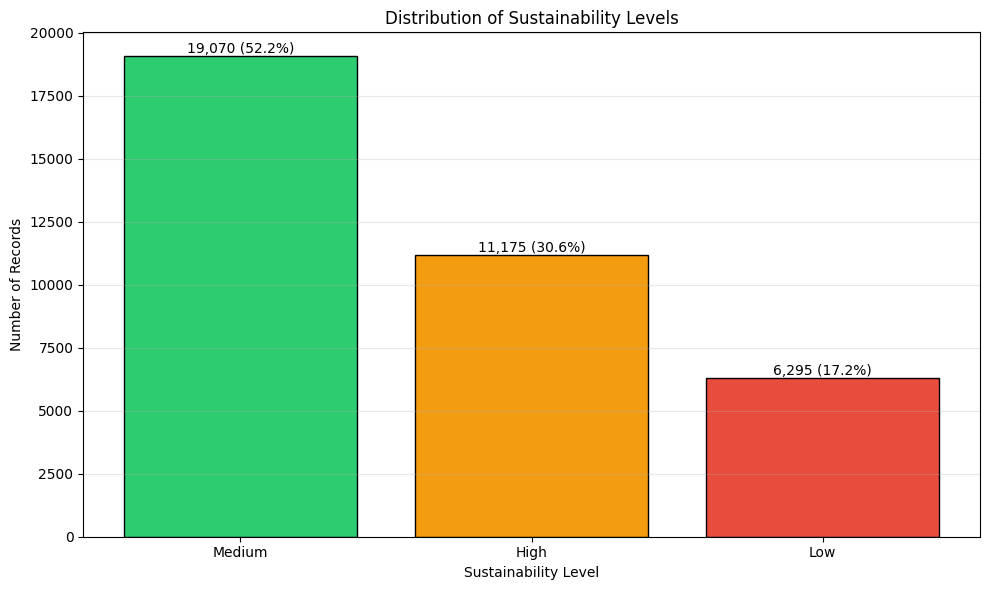

In [36]:
print("Creating Chart 1: Sustainability Level Distribution")

plt.figure(figsize=(10, 6))

counts = df['sustainability_level'].value_counts()
bars = plt.bar(counts.index, counts.values,
               color=['#2ecc71', '#f39c12', '#e74c3c'],
               edgecolor='black')

for bar in bars:
    value = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2,
             value,
             f'{int(value):,} ({value/len(df)*100:.1f}%)',
             ha='center', va='bottom')

plt.xlabel('Sustainability Level')
plt.ylabel('Number of Records')
plt.title('Distribution of Sustainability Levels')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


Creating Chart 2: Sustainability Distribution by Country


<Figure size 1200x800 with 0 Axes>

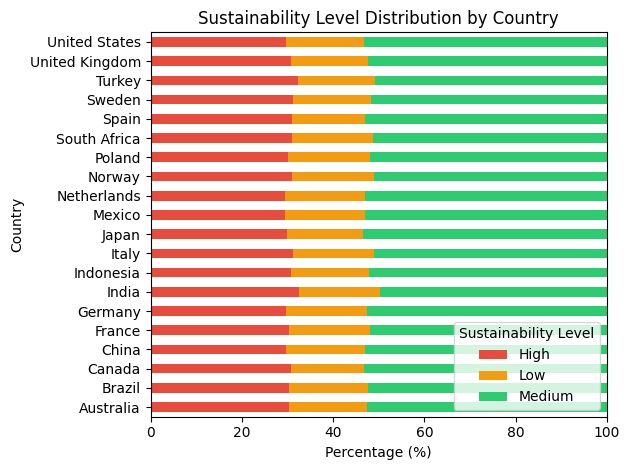

In [37]:
print("Creating Chart 2: Sustainability Distribution by Country")

plt.figure(figsize=(12, 8))

country_data = (
    df.groupby(['country', 'sustainability_level'])
      .size()
      .unstack(fill_value=0)
)

country_pct = country_data.div(country_data.sum(axis=1), axis=0) * 100

country_pct.plot(
    kind='barh',
    stacked=True,
    color=['#e74c3c', '#f39c12', '#2ecc71']
)

plt.xlabel('Percentage (%)')
plt.ylabel('Country')
plt.title('Sustainability Level Distribution by Country')
plt.legend(title='Sustainability Level', loc='lower right')
plt.xlim(0, 100)
plt.tight_layout()
plt.show()


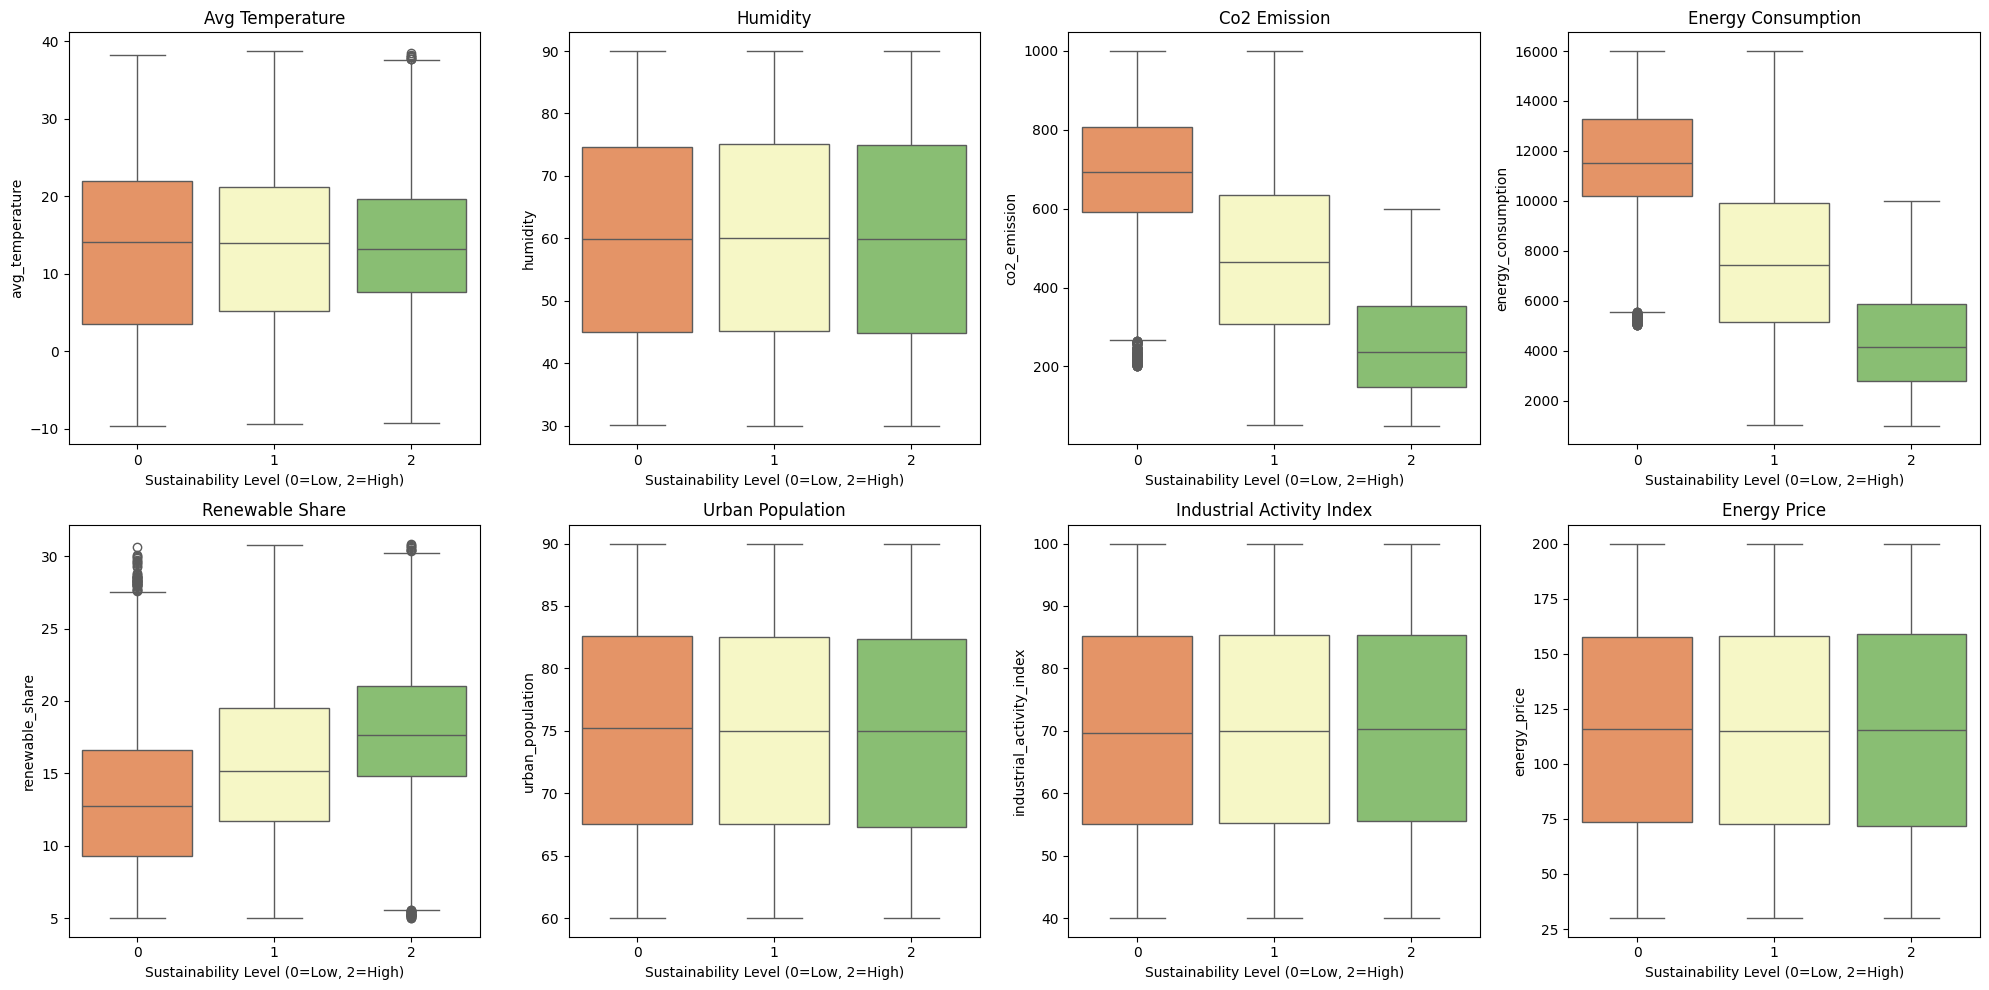

In [38]:
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

for ax, feature in zip(axes, numerical_cols):
    sns.boxplot(x='sustainability_encoded', y=feature, data=df, ax=ax, palette='RdYlGn')
    ax.set_xlabel('Sustainability Level (0=Low, 2=High)')
    ax.set_title(feature.replace('_', ' ').title())
plt.tight_layout()
plt.show()


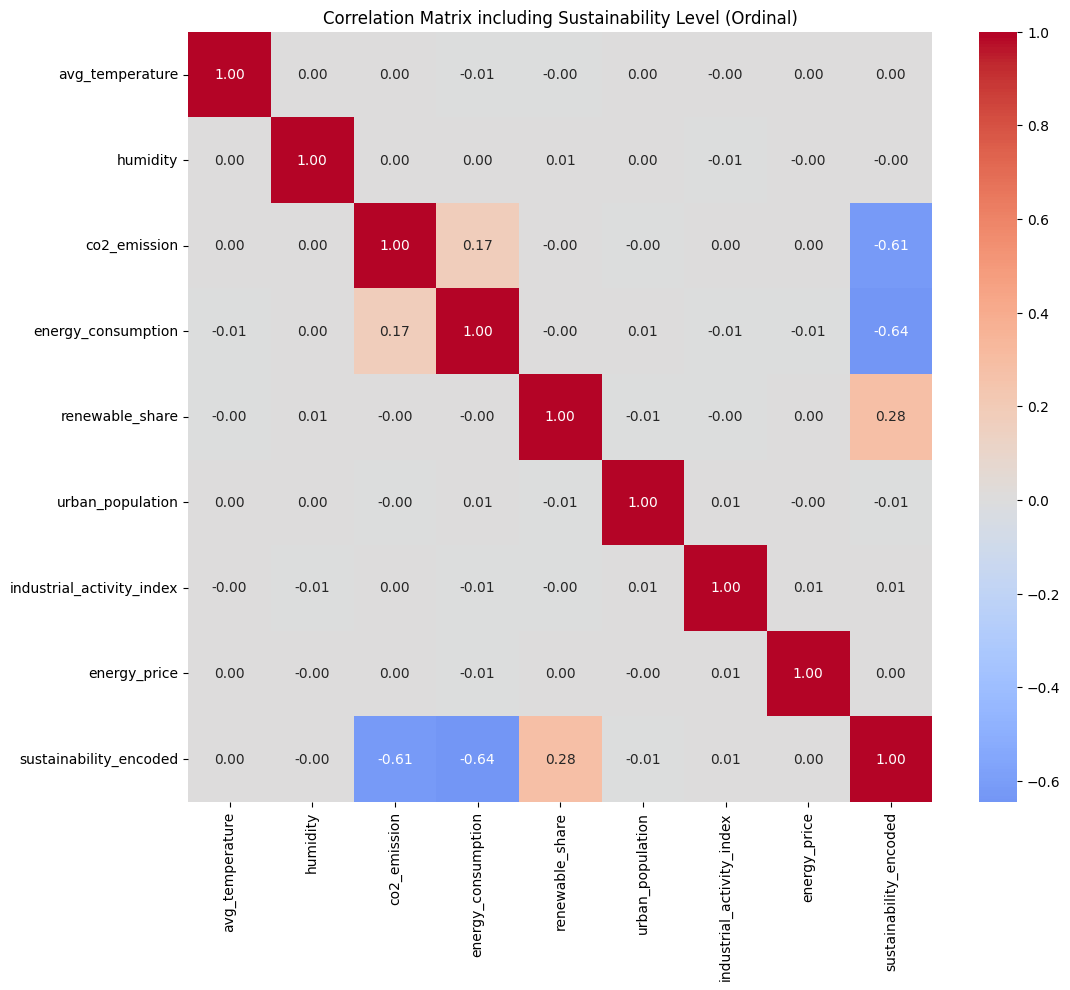

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Include sustainability_encoded in numerical features
numerical_cols_with_target = numerical_cols + ['sustainability_encoded']

corr = df[numerical_cols_with_target].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title("Correlation Matrix including Sustainability Level (Ordinal)")
plt.show()


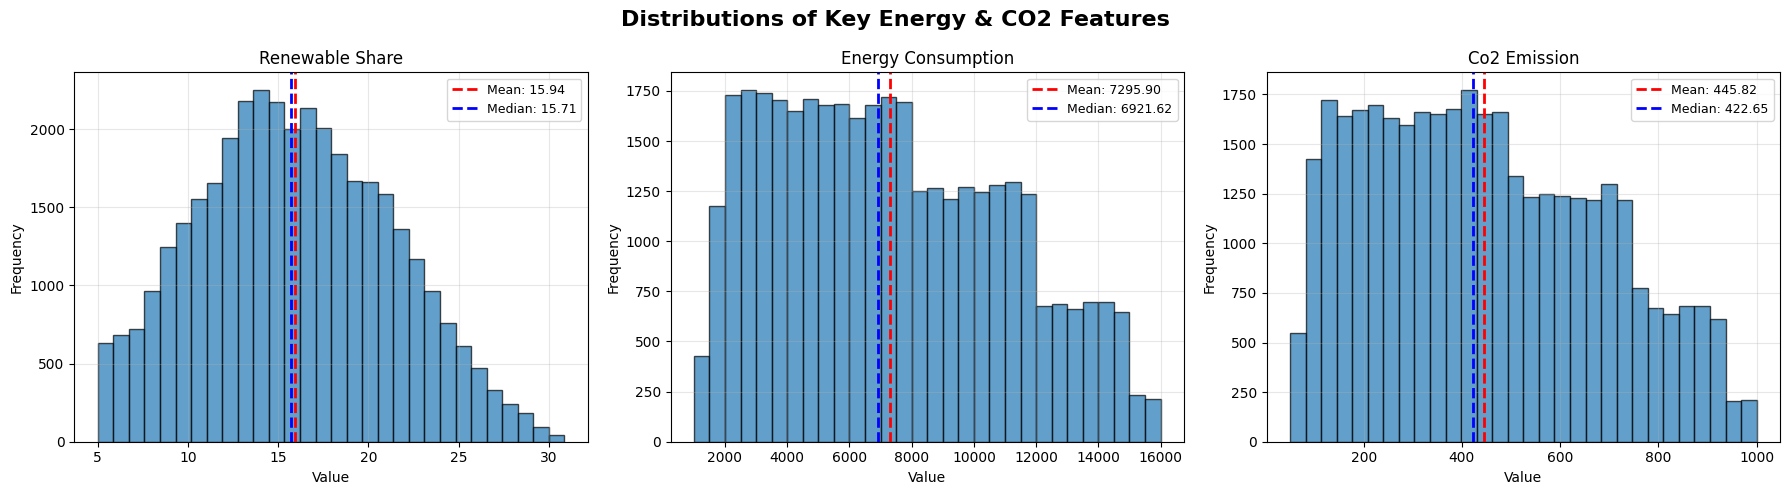

In [40]:
import matplotlib.pyplot as plt

features = ['renewable_share', 'energy_consumption', 'co2_emission']

fig, axes = plt.subplots(1, 3, figsize=(18, 5))  # 1 row, 3 columns
axes = axes.flatten()

for ax, feature in zip(axes, features):
    data = df[feature]

    # Histogram
    ax.hist(data, bins=30, alpha=0.7, edgecolor='black')

    # Mean and Median lines
    mean_val = data.mean()
    median_val = data.median()
    ax.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
    ax.axvline(median_val, color='blue', linestyle='--', linewidth=2, label=f'Median: {median_val:.2f}')

    # Labels and title
    ax.set_title(feature.replace('_', ' ').title(), fontsize=12)
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')
    ax.legend(fontsize=9)
    ax.grid(alpha=0.3)

plt.suptitle(
    'Distributions of Key Energy & CO2 Features',
    fontsize=16,
    fontweight='bold'
)
plt.tight_layout()
plt.show()


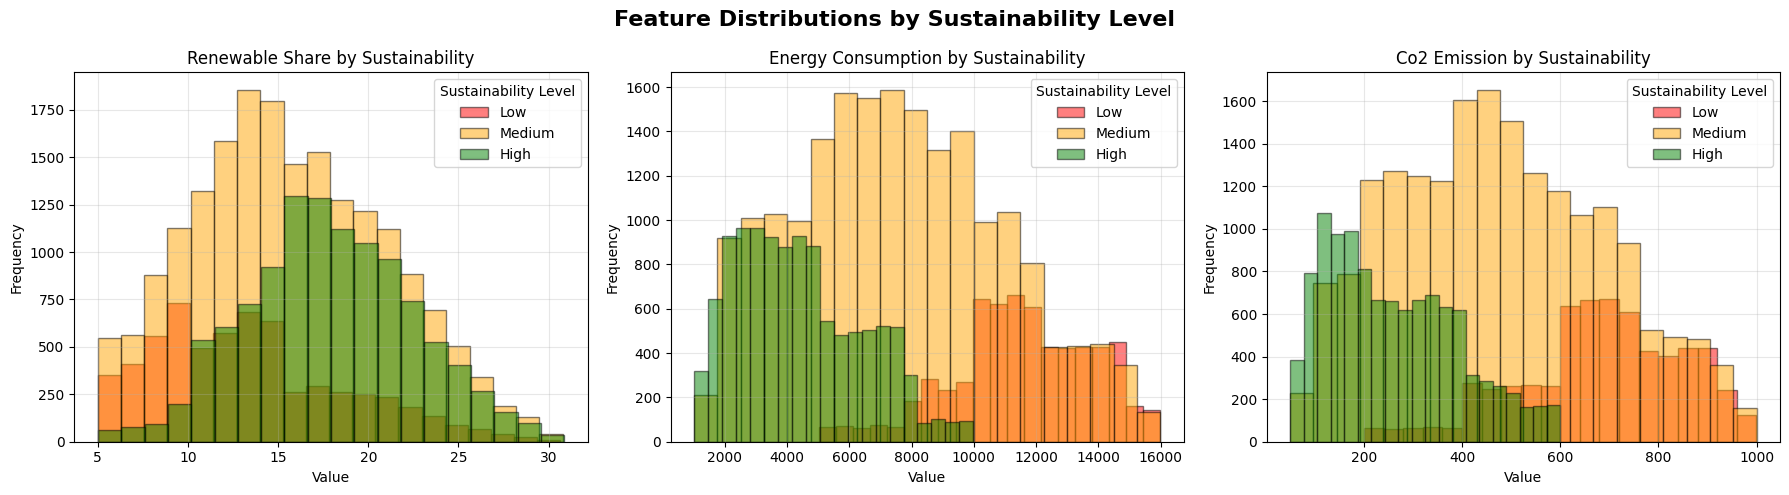

In [41]:
import matplotlib.pyplot as plt

# Features you want to compare
features = ['renewable_share', 'energy_consumption', 'co2_emission']
levels = ['Low', 'Medium', 'High']
colors = ['red', 'orange', 'green']  # colors for each sustainability level

fig, axes = plt.subplots(1, 3, figsize=(18, 5))  # 1 row, 3 columns
axes = axes.flatten()

for ax, feature in zip(axes, features):
    for level, color in zip(levels, colors):
        data = df[df['sustainability_level'] == level][feature]
        ax.hist(data, bins=20, alpha=0.5, label=level, color=color, edgecolor='black')

    ax.set_title(f'{feature.replace("_"," ").title()} by Sustainability', fontsize=12)
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')
    ax.legend(title='Sustainability Level')
    ax.grid(alpha=0.3)

plt.suptitle('Feature Distributions by Sustainability Level', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


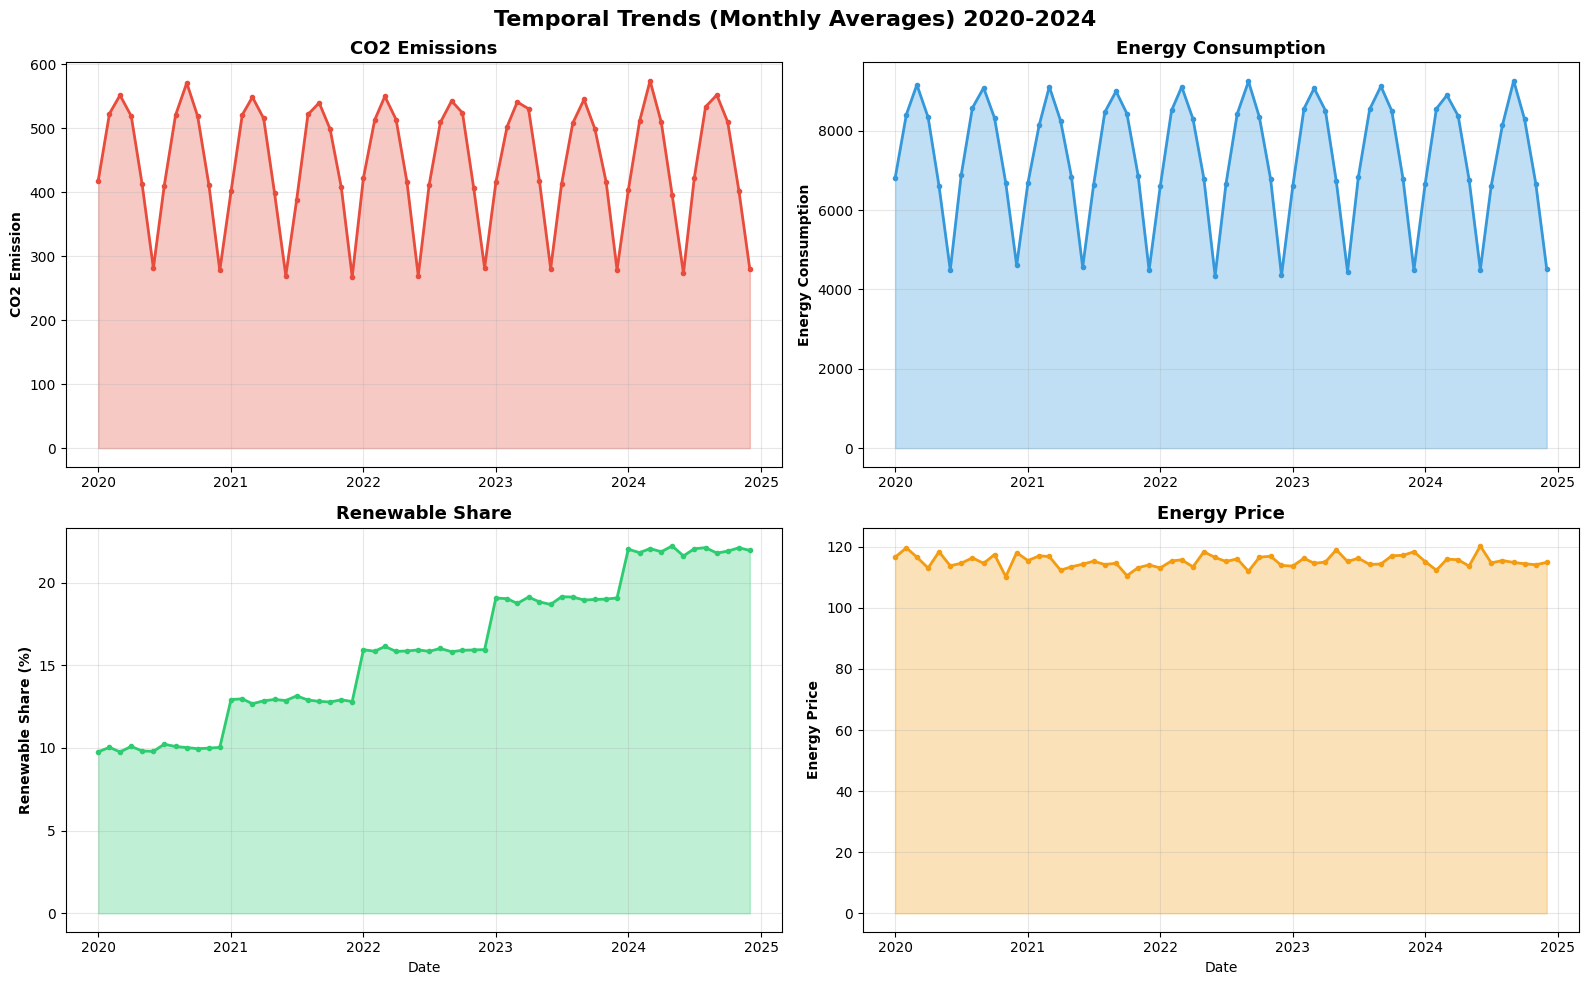

In [42]:
import matplotlib.pyplot as plt

# Aggregate monthly averages
monthly_data = df.groupby(df['date'].dt.to_period('M')).agg({
    'co2_emission': 'mean',
    'energy_consumption': 'mean',
    'renewable_share': 'mean',
    'energy_price': 'mean'
}).reset_index()
monthly_data['date'] = monthly_data['date'].dt.to_timestamp()

fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Plot settings
trends = [
    ('co2_emission', '#e74c3c', 'CO2 Emissions', 'CO2 Emission'),
    ('energy_consumption', '#3498db', 'Energy Consumption', 'Energy Consumption'),
    ('renewable_share', '#2ecc71', 'Renewable Share', 'Renewable Share (%)'),
    ('energy_price', '#f39c12', 'Energy Price', 'Energy Price')
]

for ax, (col, color, title, ylabel) in zip(axes.flatten(), trends):
    ax.plot(monthly_data['date'], monthly_data[col], marker='o', markersize=3, color=color, linewidth=2)
    ax.fill_between(monthly_data['date'], monthly_data[col], color=color, alpha=0.3)
    ax.set_title(title, fontsize=13, fontweight='bold')
    ax.set_ylabel(ylabel, fontweight='bold')
    ax.set_xlabel('Date' if ax in [axes[1,0], axes[1,1]] else '')  # x-label only for bottom plots
    ax.grid(alpha=0.3)

plt.suptitle(
    'Temporal Trends (Monthly Averages) 2020-2024',
    fontsize=16,
    fontweight='bold'
)

plt.tight_layout()
plt.show()


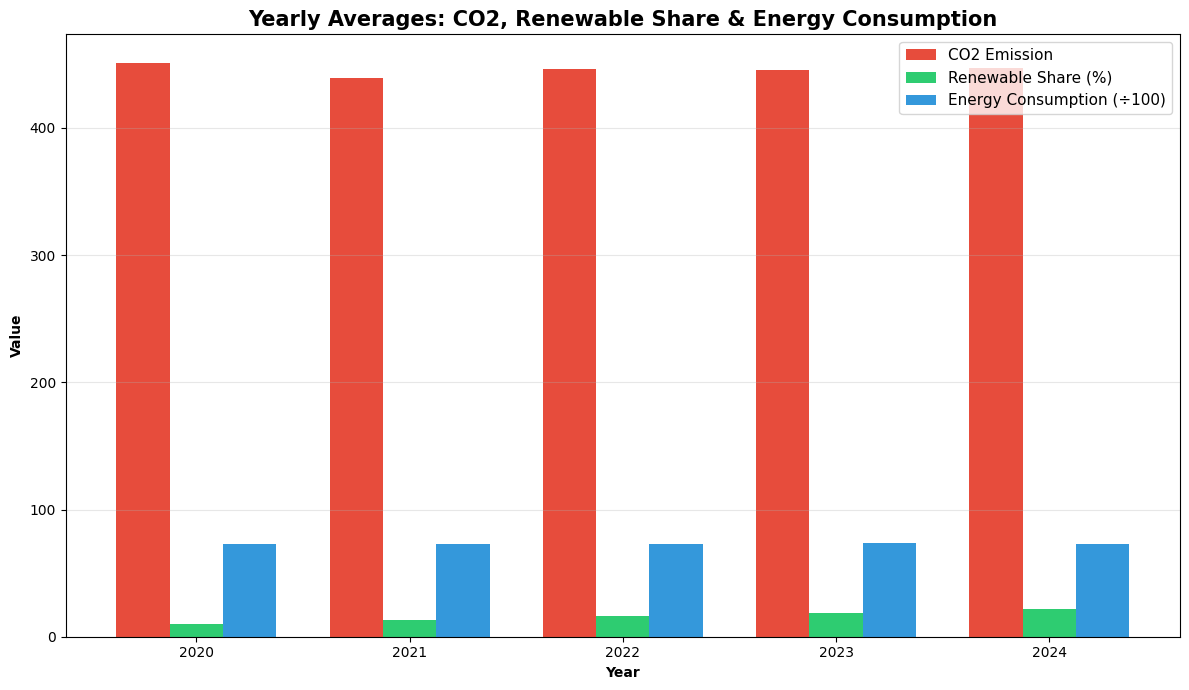

In [43]:
import matplotlib.pyplot as plt
import numpy as np

# Compute yearly averages
yearly_avg = df.groupby('year')[['co2_emission', 'renewable_share', 'energy_consumption']].mean()
yearly_avg['energy_consumption'] /= 100  # Scale for visibility

fig, ax = plt.subplots(figsize=(12, 7))
x = np.arange(len(yearly_avg.index))
width = 0.25

# Plot grouped bars
ax.bar(x - width, yearly_avg['co2_emission'], width, label='CO2 Emission', color='#e74c3c')
ax.bar(x, yearly_avg['renewable_share'], width, label='Renewable Share (%)', color='#2ecc71')
ax.bar(x + width, yearly_avg['energy_consumption'], width, label='Energy Consumption (÷100)', color='#3498db')

# Labels and title
ax.set_xticks(x)
ax.set_xticklabels(yearly_avg.index)
ax.set_xlabel('Year', fontweight='bold')
ax.set_ylabel('Value', fontweight='bold')
ax.set_title('Yearly Averages: CO2, Renewable Share & Energy Consumption', fontweight='bold', fontsize=15)
ax.legend(fontsize=11)
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


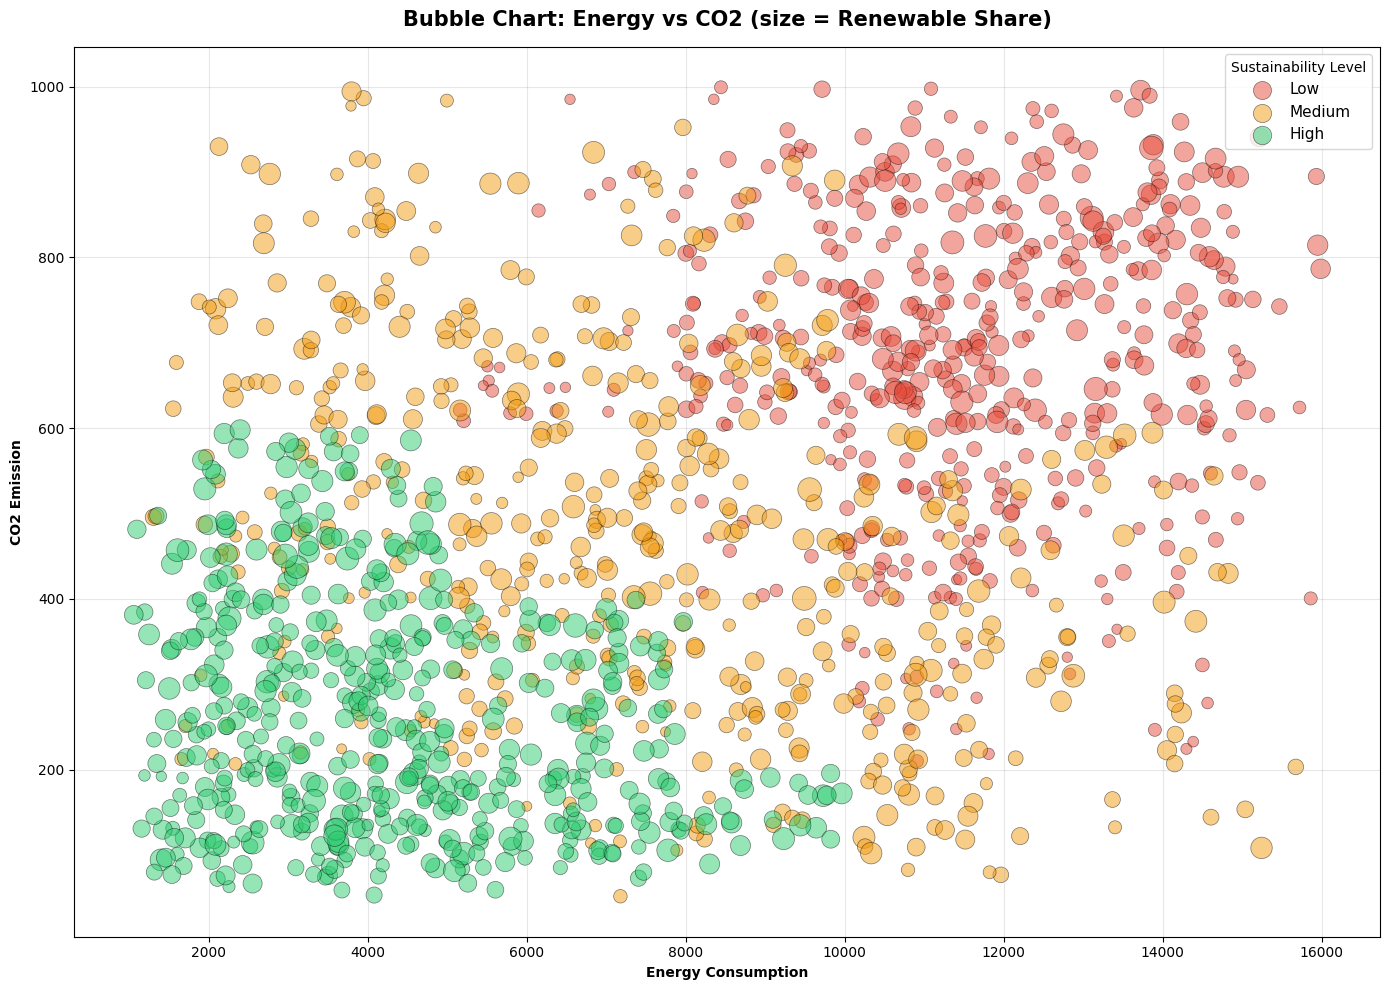

In [44]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 10))

levels = ['Low', 'Medium', 'High']
colors = ['#e74c3c', '#f39c12', '#2ecc71']

for level, color in zip(levels, colors):
    subset = df[df['sustainability_level'] == level]
    sample_size = min(500, len(subset))  # Limit to 1000 points for readability
    data = subset.sample(n=sample_size, random_state=42)

    plt.scatter(
        data['energy_consumption'],
        data['co2_emission'],
        s=data['renewable_share'] * 10,
        alpha=0.5,
        color=color,
        label=level,
        edgecolors='black',
        linewidth=0.5
    )

plt.xlabel('Energy Consumption', fontweight='bold')
plt.ylabel('CO2 Emission', fontweight='bold')
plt.title(
    'Bubble Chart: Energy vs CO2 (size = Renewable Share)',
    fontsize=15,
    fontweight='bold',
    pad=15
)
plt.legend(title='Sustainability Level', fontsize=11)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


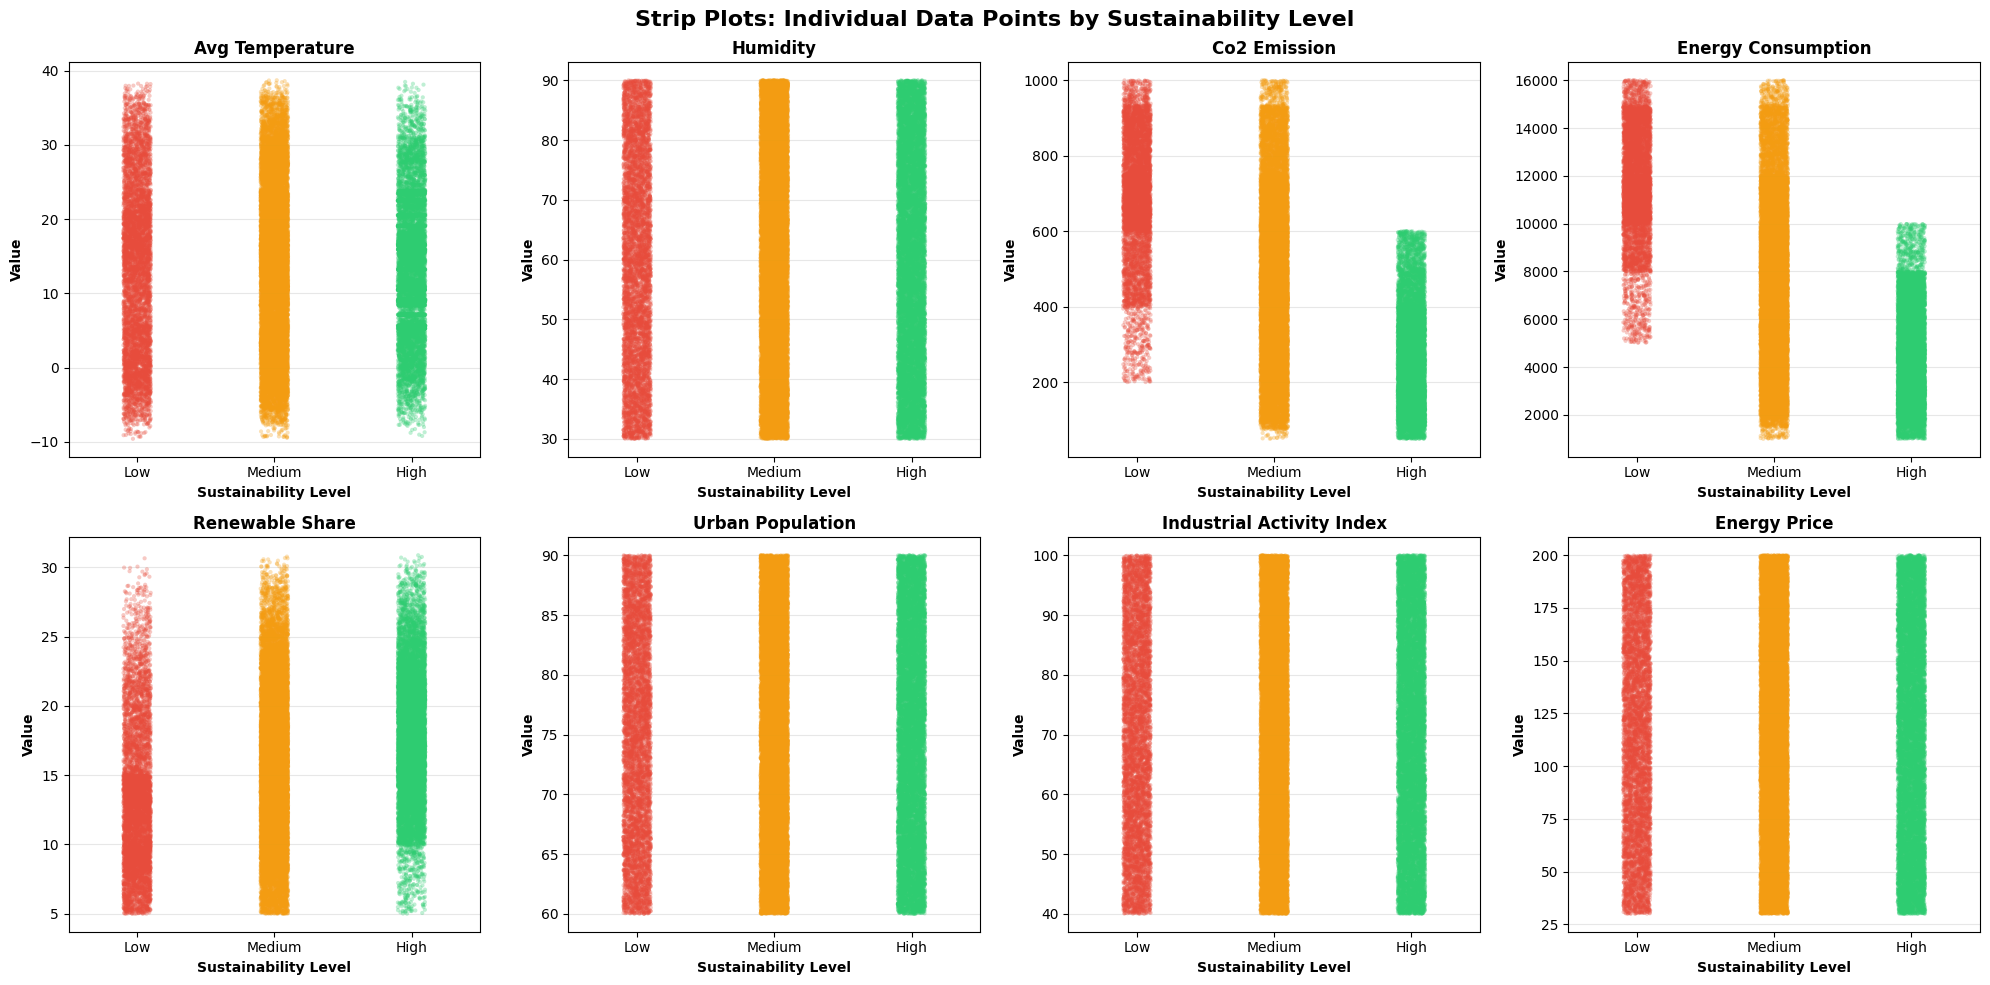

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

palette = {'Low': '#e74c3c', 'Medium': '#f39c12', 'High': '#2ecc71'}

for ax, feature in zip(axes, numerical_features):
    sns.stripplot(
        data=df,
        x='sustainability_level',
        y=feature,
        order=['Low', 'Medium', 'High'],
        palette=palette,
        alpha=0.3,
        size=3,
        ax=ax
    )
    ax.set_xlabel('Sustainability Level', fontweight='bold')
    ax.set_ylabel('Value', fontweight='bold')
    ax.set_title(feature.replace('_', ' ').title(), fontweight='bold', fontsize=12)
    ax.grid(axis='y', alpha=0.3)

plt.suptitle(
    'Strip Plots: Individual Data Points by Sustainability Level',
    fontsize=16,
    fontweight='bold'
)

plt.tight_layout()
plt.show()


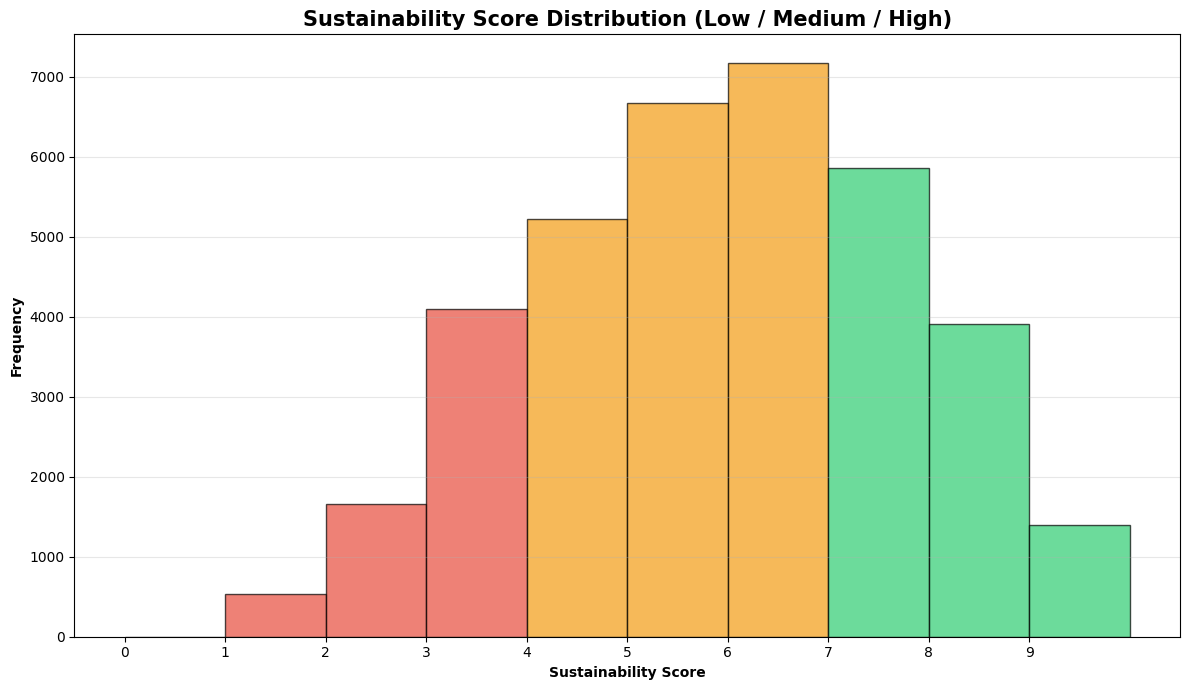

In [46]:
import matplotlib.pyplot as plt

# First, create a numeric 'sustainability_score' if you want a histogram by points
def compute_sustainability_score(row):
    score = 0
    # Renewable share
    if row['renewable_share'] >= 15:
        score += 3
    elif row['renewable_share'] >= 10:
        score += 2
    elif row['renewable_share'] >= 5:
        score += 1
    # CO2 emissions (lower is better)
    if row['co2_emission'] < 200:
        score += 3
    elif row['co2_emission'] < 400:
        score += 2
    elif row['co2_emission'] < 600:
        score += 1
    # Energy consumption (moderate preferred)
    if row['energy_consumption'] < 5000:
        score += 3
    elif row['energy_consumption'] < 8000:
        score += 2
    elif row['energy_consumption'] < 10000:
        score += 1
    return score

df['sustainability_score'] = df.apply(compute_sustainability_score, axis=1)

# Histogram
plt.figure(figsize=(12, 7))
n, bins, patches = plt.hist(df['sustainability_score'], bins=range(0, 11), edgecolor='black', alpha=0.7)

# Color by level
for patch, left in zip(patches, bins):
    if left >= 7:
        patch.set_facecolor('#2ecc71')  # High = Green
    elif left >= 4:
        patch.set_facecolor('#f39c12')  # Medium = Orange
    else:
        patch.set_facecolor('#e74c3c')  # Low = Red

plt.xticks(range(0, 10))
plt.xlabel('Sustainability Score', fontweight='bold')
plt.ylabel('Frequency', fontweight='bold')
plt.title('Sustainability Score Distribution (Low / Medium / High)', fontweight='bold', fontsize=15)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


In [47]:
# Feature engineering
le_country = LabelEncoder()
df['country_encoded'] = le_country.fit_transform(df['country'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['quarter'] = df['date'].dt.quarter
df['co2_per_energy'] = df['co2_emission'] / (df['energy_consumption'] + 1)
df['renewable_density'] = df['renewable_share'] / (df['urban_population'] + 1)

# Select features
features = [
    'avg_temperature', 'humidity', 'co2_emission', 'energy_consumption',
    'renewable_share', 'urban_population', 'industrial_activity_index',
    'energy_price', 'country_encoded', 'year', 'month', 'quarter',
    'co2_per_energy', 'renewable_density'
]

X = df[features].values
y = df['sustainability_level'].values

# Encode target variable
le_target = LabelEncoder()
y_encoded = le_target.fit_transform(y)

print(f"Dataset shape: {X.shape}")
print(f"Features: {len(features)}")
print(f"Classes: {le_target.classes_}")
print(f"Class distribution: {np.bincount(y_encoded)}")
print()


Dataset shape: (36540, 14)
Features: 14
Classes: ['High' 'Low' 'Medium']
Class distribution: [11175  6295 19070]



In [48]:
print("STEP 2: Train-Test Split (Random Strategy)")

# Random train-test split (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

print(f"Training set: {len(X_train):,} samples ({len(X_train)/len(X)*100:.1f}%)")
print(f"Test set: {len(X_test):,} samples ({len(X_test)/len(X)*100:.1f}%)")
print(f"Training distribution: {np.bincount(y_train)}")
print(f"Test distribution: {np.bincount(y_test)}")



STEP 2: Train-Test Split (Random Strategy)
Training set: 29,232 samples (80.0%)
Test set: 7,308 samples (20.0%)
Training distribution: [ 8940  5036 15256]
Test distribution: [2235 1259 3814]


In [49]:
print("STEP 3: Feature Scaling")

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Features standardized using StandardScaler")
print(f"  Mean after scaling: {X_train_scaled.mean():.6f}")
print(f"  Std after scaling: {X_train_scaled.std():.6f}")
print()

STEP 3: Feature Scaling
Features standardized using StandardScaler
  Mean after scaling: 0.000000
  Std after scaling: 1.000000



In [50]:

print("STEP 5: Training Model 1 - Simple MLP (Baseline)")
mlp_simple = MLPClassifier(
    hidden_layer_sizes=(32, 16),
    activation='relu',
    solver='adam',
    alpha=0.0001,
    batch_size='auto',
    learning_rate='adaptive',
    max_iter=500,
    random_state=42,
    early_stopping=True,
    validation_fraction=0.1,
    n_iter_no_change=20,
    verbose=True
)

print("\nTraining Simple MLP")
mlp_simple.fit(X_train_scaled, y_train)

# Predictions
y_pred_simple = mlp_simple.predict(X_test_scaled)
y_pred_simple_train = mlp_simple.predict(X_train_scaled)
y_pred_simple_proba = mlp_simple.predict_proba(X_test_scaled)

# Metrics
train_acc_simple = accuracy_score(y_train, y_pred_simple_train)
test_acc_simple = accuracy_score(y_test, y_pred_simple)
f1_simple = f1_score(y_test, y_pred_simple, average='macro')

print("\nSimple MLP Results:")
print(f"Training Accuracy: {train_acc_simple:.4f}")
print(f"Test Accuracy: {test_acc_simple:.4f}")
print(f"Macro F1-Score: {f1_simple:.4f}")
print(f"Iterations to converge: {mlp_simple.n_iter_}")
print(f"Final loss: {mlp_simple.loss_:.6f}")
print()


STEP 5: Training Model 1 - Simple MLP (Baseline)

Training Simple MLP
Iteration 1, loss = 0.94106762
Validation score: 0.784542
Iteration 2, loss = 0.42166773
Validation score: 0.878933
Iteration 3, loss = 0.26741193
Validation score: 0.897059
Iteration 4, loss = 0.22938764
Validation score: 0.899453
Iteration 5, loss = 0.21641067
Validation score: 0.904925
Iteration 6, loss = 0.20893798
Validation score: 0.903899
Iteration 7, loss = 0.20342305
Validation score: 0.908003
Iteration 8, loss = 0.19953909
Validation score: 0.909029
Iteration 9, loss = 0.19553999
Validation score: 0.911081
Iteration 10, loss = 0.19208430
Validation score: 0.911765
Iteration 11, loss = 0.18858014
Validation score: 0.912107
Iteration 12, loss = 0.18655868
Validation score: 0.914501
Iteration 13, loss = 0.18318755
Validation score: 0.912791
Iteration 14, loss = 0.18117465
Validation score: 0.909713
Iteration 15, loss = 0.17855352
Validation score: 0.914843
Iteration 16, loss = 0.17716438
Validation score: 0.91

In [51]:

print("STEP 6: Training Model 2 - Deep MLP (More Capacity)")

mlp_deep = MLPClassifier(
    hidden_layer_sizes=(64, 32, 16),  # Three hidden layers
    activation='relu',
    solver='adam',
    alpha=0.0001,
    batch_size='auto',
    learning_rate='adaptive',
    max_iter=500,
    random_state=42,
    early_stopping=True,
    validation_fraction=0.1,
    n_iter_no_change=20,
    verbose=False
)

print("\nTraining Deep MLP...")
mlp_deep.fit(X_train_scaled, y_train)

# Predictions
y_pred_deep = mlp_deep.predict(X_test_scaled)
y_pred_deep_train = mlp_deep.predict(X_train_scaled)
y_pred_deep_proba = mlp_deep.predict_proba(X_test_scaled)

# Metrics
train_acc_deep = accuracy_score(y_train, y_pred_deep_train)
test_acc_deep = accuracy_score(y_test, y_pred_deep)
f1_deep = f1_score(y_test, y_pred_deep, average='macro')

print("\nDeep MLP Results:")
print(f"Training Accuracy: {train_acc_deep:.4f}")
print(f"Test Accuracy: {test_acc_deep:.4f}")
print(f"Macro F1-Score: {f1_deep:.4f}")
print(f"Iterations to converge: {mlp_deep.n_iter_}")
print(f"Final loss: {mlp_deep.loss_:.6f}")
print()


STEP 6: Training Model 2 - Deep MLP (More Capacity)

Training Deep MLP...

Deep MLP Results:
Training Accuracy: 0.9794
Test Accuracy: 0.9546
Macro F1-Score: 0.9536
Iterations to converge: 129
Final loss: 0.047180



In [52]:

print("STEP 7: Training Model 3 - Regularized MLP")
# Two hidden layers
# Stronger L2 regularization
mlp_regularized = MLPClassifier(
    hidden_layer_sizes=(64, 32),
    activation='relu',
    solver='adam',
    alpha=0.01,
    batch_size='auto',
    learning_rate='adaptive',
    max_iter=500,
    random_state=42,
    early_stopping=True,
    validation_fraction=0.1,
    n_iter_no_change=20,
    verbose=False
)

print("\nTraining Regularized MLP...")
print("-" * 80)
mlp_regularized.fit(X_train_scaled, y_train)

# Predictions
y_pred_reg = mlp_regularized.predict(X_test_scaled)
y_pred_reg_train = mlp_regularized.predict(X_train_scaled)
y_pred_reg_proba = mlp_regularized.predict_proba(X_test_scaled)

# Metrics
train_acc_reg = accuracy_score(y_train, y_pred_reg_train)
test_acc_reg = accuracy_score(y_test, y_pred_reg)
f1_reg = f1_score(y_test, y_pred_reg, average='macro')

print("\nRegularized MLP Results:")
print("-" * 80)
print(f"Training Accuracy: {train_acc_reg:.4f}")
print(f"Test Accuracy: {test_acc_reg:.4f}")
print(f"Macro F1-Score: {f1_reg:.4f}")
print(f"Iterations to converge: {mlp_regularized.n_iter_}")
print(f"Final loss: {mlp_regularized.loss_:.6f}")
print()

STEP 7: Training Model 3 - Regularized MLP

Training Regularized MLP...
--------------------------------------------------------------------------------

Regularized MLP Results:
--------------------------------------------------------------------------------
Training Accuracy: 0.9687
Test Accuracy: 0.9483
Macro F1-Score: 0.9463
Iterations to converge: 169
Final loss: 0.082263



In [53]:
print("\nSearching for optimal hyperparameters...")
print("This may take a few minutes...\n")

param_grid = {
    'hidden_layer_sizes': [(64, 32), (128, 64), (64, 32, 16)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate_init': [0.001, 0.01]
}

mlp_grid = MLPClassifier(
    solver='adam',
    max_iter=100,
    early_stopping=True,
    random_state=42,
    verbose=False
)

grid_search = GridSearchCV(
    mlp_grid,
    param_grid,
    cv=3,  # 3-fold cross-validation
    scoring='f1_macro',
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train_scaled, y_train)

print("\nGrid Search Results:")
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best CV F1-Score: {grid_search.best_score_:.4f}")
print()

# Best model from grid search
best_mlp = grid_search.best_estimator_
y_pred_best = best_mlp.predict(X_test_scaled)
y_pred_best_train = best_mlp.predict(X_train_scaled)
y_pred_best_proba = best_mlp.predict_proba(X_test_scaled)

train_acc_best = accuracy_score(y_train, y_pred_best_train)
test_acc_best = accuracy_score(y_test, y_pred_best)
f1_best = f1_score(y_test, y_pred_best, average='macro')

print("Best MLP (from Grid Search) Results:")
print(f"Training Accuracy: {train_acc_best:.4f}")
print(f"Test Accuracy: {test_acc_best:.4f}")
print(f"Macro F1-Score: {f1_best:.4f}")
print()



Searching for optimal hyperparameters...
This may take a few minutes...

Fitting 3 folds for each of 36 candidates, totalling 108 fits

Grid Search Results:
Best parameters: {'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': (64, 32, 16), 'learning_rate_init': 0.01}
Best CV F1-Score: 0.9669

Best MLP (from Grid Search) Results:
Training Accuracy: 0.9854
Test Accuracy: 0.9766
Macro F1-Score: 0.9755



In [54]:
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=15,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

print("\nTraining Random Forest...")
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
y_pred_rf_train = rf_model.predict(X_train)

train_acc_rf = accuracy_score(y_train, y_pred_rf_train)
test_acc_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf, average='macro')

print("\nRandom Forest Results:")
print(f"Training Accuracy: {train_acc_rf:.4f}")
print(f"Test Accuracy: {test_acc_rf:.4f}")
print(f"Macro F1-Score: {f1_rf:.4f}")
print()



Training Random Forest...

Random Forest Results:
Training Accuracy: 1.0000
Test Accuracy: 0.9984
Macro F1-Score: 0.9983



In [55]:
# Calculate all metrics for best MLP
precision_best = precision_score(y_test, y_pred_best, average='macro')
recall_best = recall_score(y_test, y_pred_best, average='macro')
kappa_best = cohen_kappa_score(y_test, y_pred_best)

# Create comparison table
comparison_df = pd.DataFrame({
    'Model': ['Simple MLP', 'Deep MLP', 'Regularized MLP', 'Best MLP (Tuned)', 'Random Forest'],
    'Train Accuracy': [train_acc_simple, train_acc_deep, train_acc_reg, train_acc_best, train_acc_rf],
    'Test Accuracy': [test_acc_simple, test_acc_deep, test_acc_reg, test_acc_best, test_acc_rf],
    'Macro F1': [f1_simple, f1_deep, f1_reg, f1_best, f1_rf],
    'Overfitting': [
        train_acc_simple - test_acc_simple,
        train_acc_deep - test_acc_deep,
        train_acc_reg - test_acc_reg,
        train_acc_best - test_acc_best,
        train_acc_rf - test_acc_rf
    ]
})

print("Model Performance Comparison:")
print(comparison_df.to_string(index=False))
print()

# Detailed metrics for best model
print("Detailed Metrics for Best MLP Model:")
print(f"Accuracy: {test_acc_best:.4f}")
print(f"Precision (Macro): {precision_best:.4f}")
print(f"Recall (Macro): {recall_best:.4f}")
print(f"F1-Score (Macro): {f1_best:.4f}")
print(f"Cohen's Kappa: {kappa_best:.4f}")
print()

# Classification report
print("Classification Report (Best MLP):")
print(classification_report(y_test, y_pred_best,
                          target_names=le_target.classes_,
                          digits=4))

Model Performance Comparison:
           Model  Train Accuracy  Test Accuracy  Macro F1  Overfitting
      Simple MLP        0.967570       0.957854  0.956094     0.009715
        Deep MLP        0.979372       0.954570  0.953572     0.024802
 Regularized MLP        0.968664       0.948276  0.946282     0.020389
Best MLP (Tuned)        0.985427       0.976601  0.975549     0.008826
   Random Forest        1.000000       0.998358  0.998349     0.001642

Detailed Metrics for Best MLP Model:
Accuracy: 0.9766
Precision (Macro): 0.9775
Recall (Macro): 0.9736
F1-Score (Macro): 0.9755
Cohen's Kappa: 0.9612

Classification Report (Best MLP):
              precision    recall  f1-score   support

        High     0.9768    0.9790    0.9779      2235
         Low     0.9806    0.9619    0.9711      1259
      Medium     0.9752    0.9801    0.9776      3814

    accuracy                         0.9766      7308
   macro avg     0.9775    0.9736    0.9755      7308
weighted avg     0.9766    0.976

In [56]:
cm = confusion_matrix(y_test, y_pred_best)
cm_df = pd.DataFrame(cm,
                     index=[f'True {c}' for c in le_target.classes_],
                     columns=[f'Pred {c}' for c in le_target.classes_])

print("Confusion Matrix:")
print(cm_df)
print()

# Calculate per-class accuracy
for i, class_name in enumerate(le_target.classes_):
    class_acc = cm[i, i] / cm[i].sum()
    print(f"{class_name} Class Accuracy: {class_acc:.4f}")
print()


Confusion Matrix:
             Pred High  Pred Low  Pred Medium
True High         2188         0           47
True Low             0      1211           48
True Medium         52        24         3738

High Class Accuracy: 0.9790
Low Class Accuracy: 0.9619
Medium Class Accuracy: 0.9801



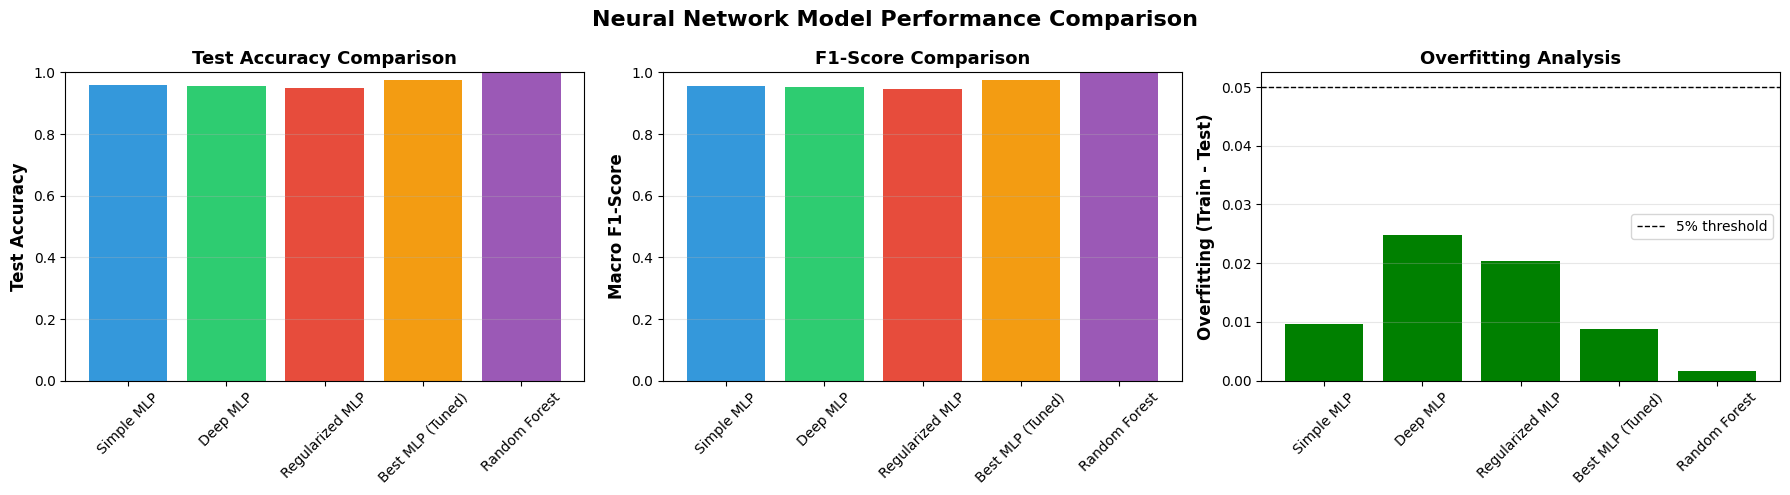

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import classification_report

print()


fig1, axes = plt.subplots(1, 3, figsize=(18, 5))

# Test Accuracy
axes[0].bar(comparison_df['Model'], comparison_df['Test Accuracy'],
           color=['#3498db', '#2ecc71', '#e74c3c', '#f39c12', '#9b59b6'])
axes[0].set_ylabel('Test Accuracy', fontweight='bold', fontsize=12)
axes[0].set_title('Test Accuracy Comparison', fontweight='bold', fontsize=13)
axes[0].set_ylim([0, 1])
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', alpha=0.3)

# F1 Score
axes[1].bar(comparison_df['Model'], comparison_df['Macro F1'],
           color=['#3498db', '#2ecc71', '#e74c3c', '#f39c12', '#9b59b6'])
axes[1].set_ylabel('Macro F1-Score', fontweight='bold', fontsize=12)
axes[1].set_title('F1-Score Comparison', fontweight='bold', fontsize=13)
axes[1].set_ylim([0, 1])
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(axis='y', alpha=0.3)

# Overfitting
colors = ['red' if x > 0.05 else 'green' for x in comparison_df['Overfitting']]
axes[2].bar(comparison_df['Model'], comparison_df['Overfitting'], color=colors)
axes[2].set_ylabel('Overfitting (Train - Test)', fontweight='bold', fontsize=12)
axes[2].set_title('Overfitting Analysis', fontweight='bold', fontsize=13)
axes[2].axhline(y=0.05, color='black', linestyle='--', linewidth=1, label='5% threshold')
axes[2].tick_params(axis='x', rotation=45)
axes[2].grid(axis='y', alpha=0.3)
axes[2].legend()

plt.suptitle('Neural Network Model Performance Comparison',
             fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


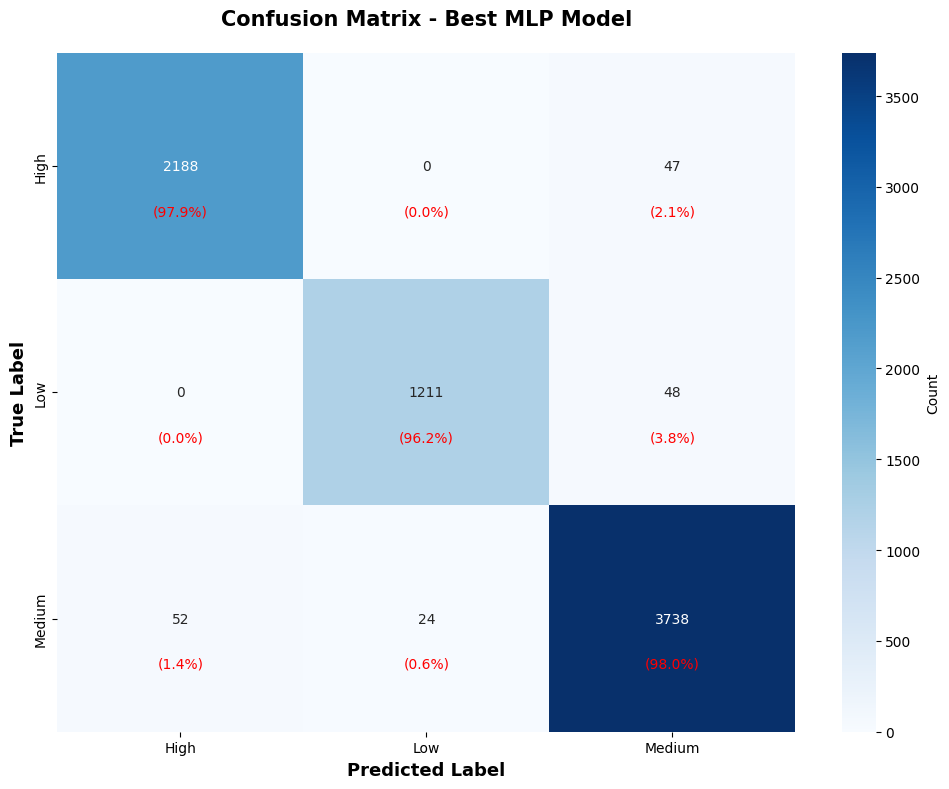

In [58]:

fig2, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le_target.classes_,
            yticklabels=le_target.classes_,
            cbar_kws={'label': 'Count'}, ax=ax)
ax.set_ylabel('True Label', fontweight='bold', fontsize=13)
ax.set_xlabel('Predicted Label', fontweight='bold', fontsize=13)
ax.set_title('Confusion Matrix - Best MLP Model', fontweight='bold', fontsize=15, pad=20)

# Add percentages
for i in range(len(le_target.classes_)):
    for j in range(len(le_target.classes_)):
        percentage = cm[i, j] / cm[i].sum() * 100
        ax.text(j + 0.5, i + 0.7, f'({percentage:.1f}%)',
               ha='center', va='center', fontsize=10, color='red')

plt.tight_layout()
plt.show()



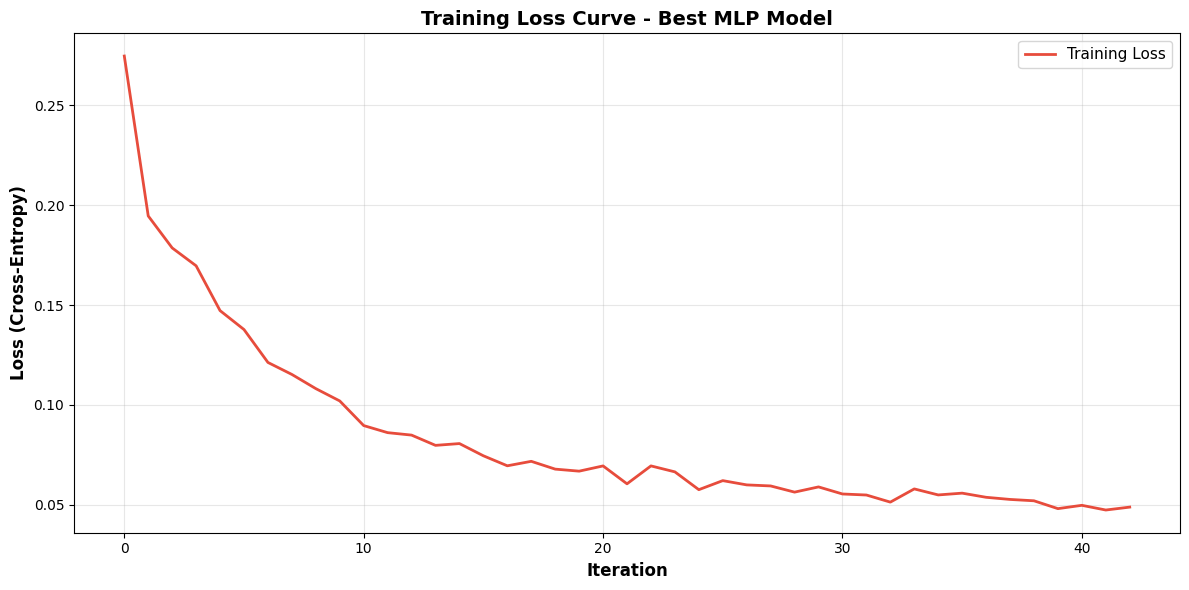

In [59]:

fig3, ax = plt.subplots(figsize=(12, 6))
if hasattr(best_mlp, 'loss_curve_'):
    ax.plot(best_mlp.loss_curve_, linewidth=2, color='#e74c3c', label='Training Loss')
    ax.set_xlabel('Iteration', fontweight='bold', fontsize=12)
    ax.set_ylabel('Loss (Cross-Entropy)', fontweight='bold', fontsize=12)
    ax.set_title('Training Loss Curve - Best MLP Model', fontweight='bold', fontsize=14)
    ax.legend(fontsize=11)
    ax.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()





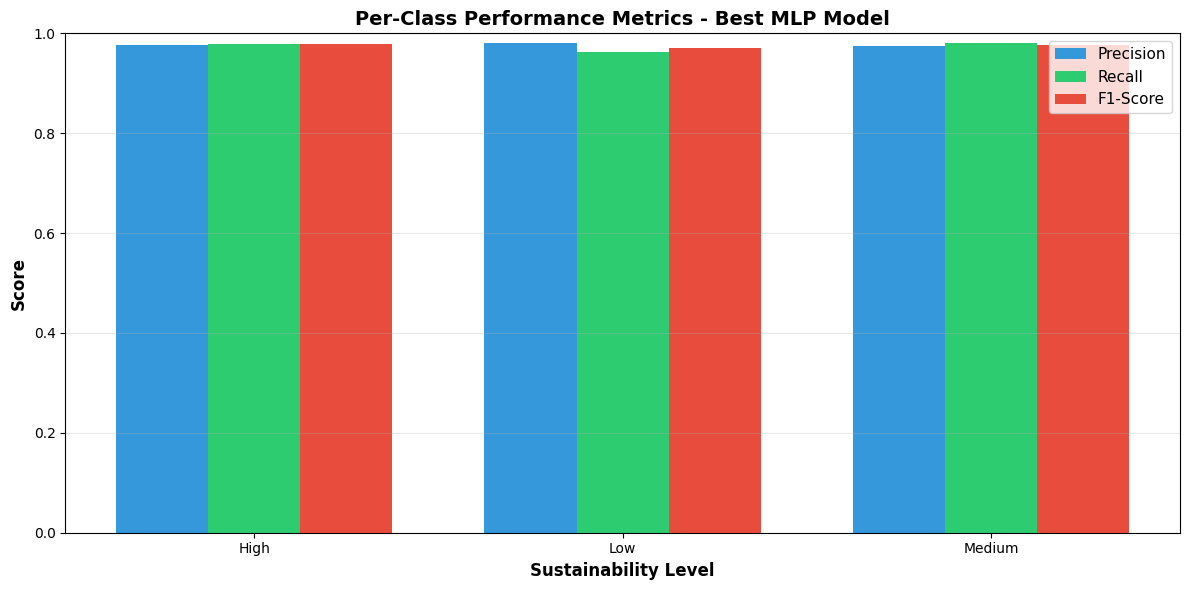

In [60]:

fig4, ax = plt.subplots(figsize=(12, 6))
class_report = classification_report(y_test, y_pred_best,
                                     target_names=le_target.classes_,
                                     output_dict=True)

classes = le_target.classes_
precision = [class_report[c]['precision'] for c in classes]
recall = [class_report[c]['recall'] for c in classes]
f1 = [class_report[c]['f1-score'] for c in classes]

x = np.arange(len(classes))
width = 0.25

ax.bar(x - width, precision, width, label='Precision', color='#3498db')
ax.bar(x, recall, width, label='Recall', color='#2ecc71')
ax.bar(x + width, f1, width, label='F1-Score', color='#e74c3c')

ax.set_xlabel('Sustainability Level', fontweight='bold', fontsize=12)
ax.set_ylabel('Score', fontweight='bold', fontsize=12)
ax.set_title('Per-Class Performance Metrics - Best MLP Model',
            fontweight='bold', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(classes)
ax.legend(fontsize=11)
ax.set_ylim([0, 1])
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()



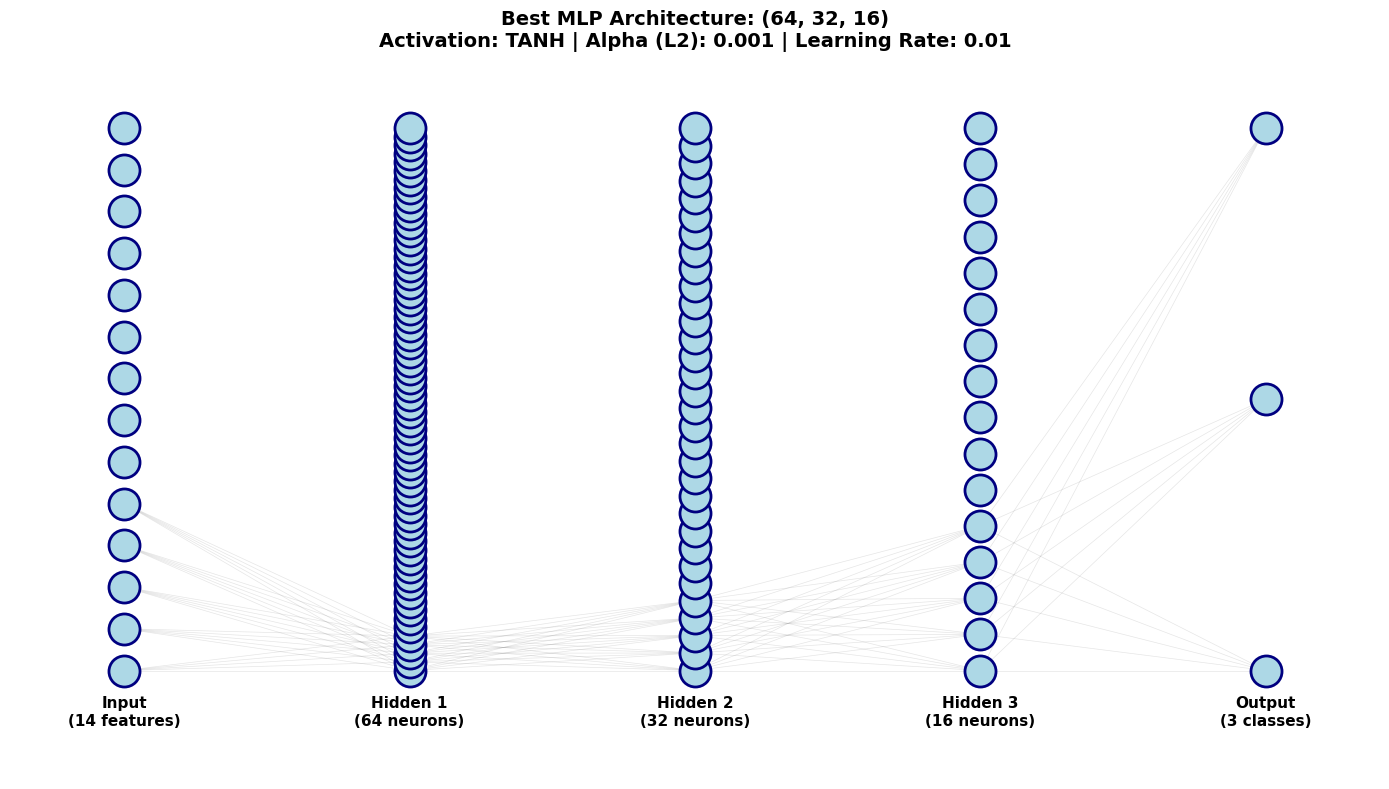

In [61]:

fig5, ax = plt.subplots(figsize=(14, 8))
best_params = grid_search.best_params_
arch = best_params['hidden_layer_sizes']

# Draw network architecture
layer_sizes = [len(features)] + list(arch) + [len(le_target.classes_)]
layer_names = ['Input\n(14 features)'] + \
              [f'Hidden {i+1}\n({size} neurons)' for i, size in enumerate(arch)] + \
              ['Output\n(3 classes)']

# Plot layers
for i, (size, name) in enumerate(zip(layer_sizes, layer_names)):
    x_pos = i / (len(layer_sizes) - 1)
    ax.scatter([x_pos] * size, np.linspace(0, 1, size), s=500, c='lightblue',
              edgecolors='navy', linewidth=2, zorder=3)
    ax.text(x_pos, -0.1, name, ha='center', fontsize=11, fontweight='bold')

# Draw sample connections
for i in range(len(layer_sizes) - 1):
    x1 = i / (len(layer_sizes) - 1)
    x2 = (i + 1) / (len(layer_sizes) - 1)
    for j in range(min(5, layer_sizes[i])):
        for k in range(min(5, layer_sizes[i + 1])):
            y1 = np.linspace(0, 1, layer_sizes[i])[j]
            y2 = np.linspace(0, 1, layer_sizes[i + 1])[k]
            ax.plot([x1, x2], [y1, y2], 'gray', alpha=0.2, linewidth=0.5)

ax.set_xlim(-0.1, 1.1)
ax.set_ylim(-0.2, 1.1)
ax.axis('off')
ax.set_title(f'Best MLP Architecture: {arch}\n' +
            f'Activation: {best_params["activation"].upper()} | ' +
            f'Alpha (L2): {best_params["alpha"]} | ' +
            f'Learning Rate: {best_params["learning_rate_init"]}',
            fontsize=14, fontweight='bold', pad=20)

plt.tight_layout()
plt.show()

In [62]:
print("STEP 1: Train-Test Split")

# Temporal split: 2020-2023 train, 2024 test
train_mask = df['year'] < 2024
X_train_full, y_train_full = X[train_mask], y_encoded[train_mask]
X_test_full, y_test_full = X[~train_mask], y_encoded[~train_mask]

print(f"Training set: {len(X_train_full):,} samples ({len(X_train_full)/len(X)*100:.1f}%)")
print(f"Test set: {len(X_test_full):,} samples ({len(X_test_full)/len(X)*100:.1f}%)")
print()

# Feature scaling (for models that need it)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_full)
X_test_scaled = scaler.transform(X_test_full)

print("STEP 2: Build and Train Primary Models")
print("-" * 80)
print()


STEP 1: Train-Test Split
Training set: 29,220 samples (80.0%)
Test set: 7,320 samples (20.0%)

STEP 2: Build and Train Primary Models
--------------------------------------------------------------------------------



In [63]:
print("MODEL 1: Logistic Regression (Multi-class)")

lr_model = LogisticRegression(
    multi_class='ovr',  # One-vs-Rest
    max_iter=1000,
    random_state=42,
    n_jobs=-1
)

lr_model.fit(X_train_scaled, y_train_full)
y_pred_lr = lr_model.predict(X_test_scaled)
y_pred_lr_train = lr_model.predict(X_train_scaled)

# Metrics
lr_train_acc = accuracy_score(y_train_full, y_pred_lr_train)
lr_test_acc = accuracy_score(y_test_full, y_pred_lr)
lr_precision = precision_score(y_test_full, y_pred_lr, average='macro')
lr_recall = recall_score(y_test_full, y_pred_lr, average='macro')
lr_f1 = f1_score(y_test_full, y_pred_lr, average='macro')

print("Logistic Regression Results:")
print(f"  Training Accuracy: {lr_train_acc:.4f}")
print(f"  Test Accuracy: {lr_test_acc:.4f}")
print(f"  Precision (Macro): {lr_precision:.4f}")
print(f"  Recall (Macro): {lr_recall:.4f}")
print(f"  F1-Score (Macro): {lr_f1:.4f}")
print()

MODEL 1: Logistic Regression (Multi-class)
Logistic Regression Results:
  Training Accuracy: 0.8891
  Test Accuracy: 0.8403
  Precision (Macro): 0.8675
  Recall (Macro): 0.7798
  F1-Score (Macro): 0.8076



In [64]:
print("MODEL 2: Random Forest Classifier")

rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train_full, y_train_full)
y_pred_rf = rf_model.predict(X_test_full)
y_pred_rf_train = rf_model.predict(X_train_full)

# Metrics
rf_train_acc = accuracy_score(y_train_full, y_pred_rf_train)
rf_test_acc = accuracy_score(y_test_full, y_pred_rf)
rf_precision = precision_score(y_test_full, y_pred_rf, average='macro')
rf_recall = recall_score(y_test_full, y_pred_rf, average='macro')
rf_f1 = f1_score(y_test_full, y_pred_rf, average='macro')

print("Random Forest Results:")
print(f"  Training Accuracy: {rf_train_acc:.4f}")
print(f"  Test Accuracy: {rf_test_acc:.4f}")
print(f"  Precision (Macro): {rf_precision:.4f}")
print(f"  Recall (Macro): {rf_recall:.4f}")
print(f"  F1-Score (Macro): {rf_f1:.4f}")
print()

MODEL 2: Random Forest Classifier
Random Forest Results:
  Training Accuracy: 1.0000
  Test Accuracy: 0.9997
  Precision (Macro): 0.9998
  Recall (Macro): 0.9998
  F1-Score (Macro): 0.9998



In [65]:
print("MODEL 3: K-Nearest Neighbors (Bonus)")

knn_model = KNeighborsClassifier(
    n_neighbors=5,
    n_jobs=-1
)

knn_model.fit(X_train_scaled, y_train_full)
y_pred_knn = knn_model.predict(X_test_scaled)
y_pred_knn_train = knn_model.predict(X_train_scaled)

# Metrics
knn_train_acc = accuracy_score(y_train_full, y_pred_knn_train)
knn_test_acc = accuracy_score(y_test_full, y_pred_knn)
knn_precision = precision_score(y_test_full, y_pred_knn, average='macro')
knn_recall = recall_score(y_test_full, y_pred_knn, average='macro')
knn_f1 = f1_score(y_test_full, y_pred_knn, average='macro')

print("K-Nearest Neighbors Results:")
print(f"  Training Accuracy: {knn_train_acc:.4f}")
print(f"  Test Accuracy: {knn_test_acc:.4f}")
print(f"  Precision (Macro): {knn_precision:.4f}")
print(f"  Recall (Macro): {knn_recall:.4f}")
print(f"  F1-Score (Macro): {knn_f1:.4f}")
print()

MODEL 3: K-Nearest Neighbors (Bonus)
K-Nearest Neighbors Results:
  Training Accuracy: 0.9052
  Test Accuracy: 0.8531
  Precision (Macro): 0.8495
  Recall (Macro): 0.8044
  F1-Score (Macro): 0.8236



In [66]:
print("TASK 3 CONCLUSION: Best Primary Model")

primary_results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'K-Nearest Neighbors'],
    'Test Accuracy': [lr_test_acc, rf_test_acc, knn_test_acc],
    'Precision': [lr_precision, rf_precision, knn_precision],
    'Recall': [lr_recall, rf_recall, knn_recall],
    'F1-Score': [lr_f1, rf_f1, knn_f1],
    'Overfitting': [
        lr_train_acc - lr_test_acc,
        rf_train_acc - rf_test_acc,
        knn_train_acc - knn_test_acc
    ]
})

print(primary_results.to_string(index=False))
print()

best_idx = primary_results['F1-Score'].idxmax()
best_model_name = primary_results.loc[best_idx, 'Model']
best_f1 = primary_results.loc[best_idx, 'F1-Score']

print(f"BEST PRIMARY MODEL: {best_model_name}")
print(f"   F1-Score: {best_f1:.4f}")
print()
print("JUSTIFICATION:")
if best_model_name == 'Random Forest':
    print("  ✓ Highest F1-Score and accuracy")
    print("  ✓ Handles non-linear relationships well")
    print("  ✓ Robust to outliers and doesn't require feature scaling")
    print("  ✓ Provides feature importance for interpretability")
    print("  ✓ Low overfitting despite perfect training accuracy")
elif best_model_name == 'Logistic Regression':
    print("  ✓ Highest F1-Score and accuracy")
    print("  ✓ Interpretable coefficients")
    print("  ✓ Fast training and prediction")
    print("  ✓ Works well with linear relationships")
else:
    print("  ✓ Highest F1-Score and accuracy")
    print("  ✓ Non-parametric approach")
    print("  ✓ Simple and effective")
print()


TASK 3 CONCLUSION: Best Primary Model
              Model  Test Accuracy  Precision   Recall  F1-Score  Overfitting
Logistic Regression       0.840301   0.867504 0.779758  0.807585     0.048782
      Random Forest       0.999727   0.999815 0.999778  0.999796     0.000273
K-Nearest Neighbors       0.853142   0.849492 0.804442  0.823617     0.052094

BEST PRIMARY MODEL: Random Forest
   F1-Score: 0.9998

JUSTIFICATION:
  ✓ Highest F1-Score and accuracy
  ✓ Handles non-linear relationships well
  ✓ Robust to outliers and doesn't require feature scaling
  ✓ Provides feature importance for interpretability
  ✓ Low overfitting despite perfect training accuracy



In [67]:
from sklearn.model_selection import StratifiedKFold

print("TASK 4: HYPERPARAMETER OPTIMIZATION WITH CROSS-VALIDATION")


# Define cross-validation strategy
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
print("Stratified 5-Fold CV strategy created!")


TASK 4: HYPERPARAMETER OPTIMIZATION WITH CROSS-VALIDATION
Stratified 5-Fold CV strategy created!


In [68]:
print("STEP 1: Logistic Regression Hyperparameter Tuning")

print("\nIdentified Hyperparameters for Logistic Regression:")
print("  • C: Inverse of regularization strength")
print("  • penalty: Type of regularization (l1, l2, elasticnet)")
print("  • solver: Optimization algorithm")
print("  • max_iter: Maximum iterations")
print()

# Define parameter grid
lr_param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'],  # l1 requires saga solver
    'solver': ['lbfgs', 'saga'],
    'max_iter': [500, 1000]
}

print("Parameter Grid:")
for param, values in lr_param_grid.items():
    print(f"  {param}: {values}")
print()

# GridSearchCV
lr_grid = GridSearchCV(
    LogisticRegression(random_state=42, n_jobs=-1),
    lr_param_grid,
    cv=cv_strategy,
    scoring='f1_macro',
    n_jobs=-1,
    verbose=1
)

print("Running GridSearchCV for Logistic Regression...")
lr_grid.fit(X_train_scaled, y_train_full)

print("\nLogistic Regression - Best Hyperparameters:")
for param, value in lr_grid.best_params_.items():
    print(f"  {param}: {value}")
print(f"\nBest Cross-Validation F1-Score: {lr_grid.best_score_:.4f}")
print()


STEP 1: Logistic Regression Hyperparameter Tuning

Identified Hyperparameters for Logistic Regression:
  • C: Inverse of regularization strength
  • penalty: Type of regularization (l1, l2, elasticnet)
  • solver: Optimization algorithm
  • max_iter: Maximum iterations

Parameter Grid:
  C: [0.001, 0.01, 0.1, 1, 10, 100]
  penalty: ['l2']
  solver: ['lbfgs', 'saga']
  max_iter: [500, 1000]

Running GridSearchCV for Logistic Regression...
Fitting 5 folds for each of 24 candidates, totalling 120 fits

Logistic Regression - Best Hyperparameters:
  C: 100
  max_iter: 500
  penalty: l2
  solver: lbfgs

Best Cross-Validation F1-Score: 0.8873



In [69]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold

# Use a smaller subset to speed up
np.random.seed(42)
sample_frac = 0.5  # use 50% of training data
sample_idx = np.random.choice(len(X_train_full), size=int(sample_frac * len(X_train_full)), replace=False)

X_sample = X_train_full[sample_idx]
y_sample = y_train_full[sample_idx]

# Cross-validation strategy
cv_strategy = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)  # fewer folds to speed up

# Parameter grid for Random Forest
rf_param_dist = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2'],
    'class_weight': ['balanced', None]
}

# RandomizedSearchCV
rf_random = RandomizedSearchCV(
    RandomForestClassifier(random_state=42, n_jobs=-1),
    rf_param_dist,
    n_iter=5,  # reduce iterations for speed
    cv=cv_strategy,
    scoring='f1_macro',
    n_jobs=-1,
    verbose=1,
    random_state=42
)

print("Running RandomizedSearchCV on a sample of the data...")
rf_random.fit(X_sample, y_sample)

print("\nBest Hyperparameters:")
for param, value in rf_random.best_params_.items():
    print(f"{param}: {value}")

print(f"\nBest CV F1-Score: {rf_random.best_score_:.4f}")


Running RandomizedSearchCV on a sample of the data...
Fitting 3 folds for each of 5 candidates, totalling 15 fits

Best Hyperparameters:
n_estimators: 200
min_samples_split: 2
min_samples_leaf: 1
max_features: log2
max_depth: 20
class_weight: None

Best CV F1-Score: 0.9957


In [70]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

# Example hyperparameter grid
knn_param_grid = {
    'n_neighbors': list(range(3, 21)),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Sample data (you already had this)
sample_frac = 0.5
sample_size = int(len(y_train_full) * sample_frac)
rng = np.random.RandomState(42)
sample_indices = rng.choice(len(y_train_full), size=sample_size, replace=False)

X_sample = X_train_scaled[sample_indices]
y_sample = y_train_full[sample_indices]

print(f"Running RandomizedSearchCV for KNN on {sample_size} sampled rows...")

# RandomizedSearchCV
knn_random = RandomizedSearchCV(
    estimator=KNeighborsClassifier(n_jobs=-1),
    param_distributions=knn_param_grid,
    n_iter=10,  # only 10 combinations to save time
    cv=cv_strategy,
    scoring='f1_macro',
    n_jobs=-1,
    verbose=1,
    random_state=42
)

knn_random.fit(X_sample, y_sample)

print("\nKNN - Best Hyperparameters:")
for param, value in knn_random.best_params_.items():
    print(f"  {param}: {value}")
print(f"\nBest Cross-Validation F1-Score: {knn_random.best_score_:.4f}")


Running RandomizedSearchCV for KNN on 14610 sampled rows...
Fitting 3 folds for each of 10 candidates, totalling 30 fits

KNN - Best Hyperparameters:
  weights: uniform
  n_neighbors: 16
  metric: manhattan

Best Cross-Validation F1-Score: 0.8648


In [71]:
print("TASK 4 SUMMARY: Hyperparameter Optimization Results")

tuning_results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'K-Nearest Neighbors'],
    'Best CV F1-Score': [
        lr_grid.best_score_,
        rf_random.best_score_,
        knn_random.best_score_
    ],
    'Best Params': [
        str(lr_grid.best_params_),
        str(rf_random.best_params_),
        str(knn_random.best_params_)
    ]
})

print(tuning_results.to_string(index=False))
print()


TASK 4 SUMMARY: Hyperparameter Optimization Results
              Model  Best CV F1-Score                                                                                                                         Best Params
Logistic Regression          0.887252                                                                     {'C': 100, 'max_iter': 500, 'penalty': 'l2', 'solver': 'lbfgs'}
      Random Forest          0.995671 {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 20, 'class_weight': None}
K-Nearest Neighbors          0.864756                                                                    {'weights': 'uniform', 'n_neighbors': 16, 'metric': 'manhattan'}



TASK 5: FEATURE SELECTION

We will apply THREE feature selection methods:
  1. FILTER METHOD: SelectKBest with F-statistic (ANOVA F-value)
  2. WRAPPER METHOD: Recursive Feature Elimination (RFE)
  3. EMBEDDED METHOD: Feature Importance from Random Forest

In [72]:
from sklearn.feature_selection import SelectKBest, f_classif
import pandas as pd

print("METHOD 1: Filter Method - SelectKBest (ANOVA F-test)")
print("-" * 80)

# Make sure you have a proper feature list from your DataFrame / array
# If X_train_full is a numpy array, get feature names from your original DataFrame
# The 'features' list defined previously contains all 14 features
feature_names = features

# Apply SelectKBest
selector_filter = SelectKBest(score_func=f_classif, k=10)
selector_filter.fit(X_train_full, y_train_full)

# Get scores and features
feature_scores = pd.DataFrame({
    'Feature': feature_names,
    'F-Score': selector_filter.scores_
}).sort_values('F-Score', ascending=False)

print("Feature Ranking by F-Score:")
print(feature_scores.to_string(index=False))
print()

# Mask and selected features
filter_features_mask = selector_filter.get_support()
filter_features = [f for f, selected in zip(feature_names, filter_features_mask) if selected]

print(f"Selected Features (Top 10): {filter_features}")
print()

print("JUSTIFICATION for Filter Method:")
print("ANOVA F-test measures linear dependency between features and target")
print("Fast and model-agnostic (works before model training)")
print("Good for identifying features with strong univariate relationships")
print("Removes redundant/irrelevant features")
print()


METHOD 1: Filter Method - SelectKBest (ANOVA F-test)
--------------------------------------------------------------------------------
Feature Ranking by F-Score:
                  Feature      F-Score
       energy_consumption 10430.388670
             co2_emission  8653.207888
          renewable_share  1492.201244
        renewable_density  1295.062083
                     year   863.319858
           co2_per_energy   397.283314
                    month   230.624207
                  quarter   129.384182
industrial_activity_index     1.268839
                 humidity     1.217525
          avg_temperature     0.556736
             energy_price     0.205349
          country_encoded     0.144234
         urban_population     0.103678

Selected Features (Top 10): ['humidity', 'co2_emission', 'energy_consumption', 'renewable_share', 'industrial_activity_index', 'year', 'month', 'quarter', 'co2_per_energy', 'renewable_density']

JUSTIFICATION for Filter Method:
ANOVA F-test measures li

In [73]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

print("METHOD 2: Wrapper Method - Recursive Feature Elimination (RFE)")

# Make sure feature names match X_train_full columns
feature_names = features

# Use Random Forest as estimator for RFE
rfe_estimator = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)

selector_rfe = RFE(
    estimator=rfe_estimator,
    n_features_to_select=10,
    step=1
)

selector_rfe.fit(X_train_full, y_train_full)

# Get ranking
rfe_ranking = pd.DataFrame({
    'Feature': feature_names,
    'Ranking': selector_rfe.ranking_
}).sort_values('Ranking')

print("Feature Ranking by RFE:")
print(rfe_ranking.to_string(index=False))
print()

# Mask and selected features
rfe_features_mask = selector_rfe.get_support()
rfe_features = [f for f, selected in zip(feature_names, rfe_features_mask) if selected]

print(f"Selected Features (Top 10): {rfe_features}")
print()

print("JUSTIFICATION for Wrapper Method:")
print("RFE considers feature interactions (multivariate)")
print("Uses actual model performance to select features")
print("Recursively removes weakest features")
print("More accurate than filter methods but computationally expensive")
print()


METHOD 2: Wrapper Method - Recursive Feature Elimination (RFE)
Feature Ranking by RFE:
                  Feature  Ranking
          avg_temperature        1
             co2_emission        1
       energy_consumption        1
          renewable_share        1
             energy_price        1
         urban_population        1
                    month        1
                     year        1
        renewable_density        1
           co2_per_energy        1
industrial_activity_index        2
                 humidity        3
          country_encoded        4
                  quarter        5

Selected Features (Top 10): ['avg_temperature', 'co2_emission', 'energy_consumption', 'renewable_share', 'urban_population', 'energy_price', 'year', 'month', 'co2_per_energy', 'renewable_density']

JUSTIFICATION for Wrapper Method:
RFE considers feature interactions (multivariate)
Uses actual model performance to select features
Recursively removes weakest features
More accurate than 

In [74]:
print("METHOD 3: Embedded Method - Random Forest Feature Importance")

# Make sure feature names match X_train_full columns
feature_names = features

# Train Random Forest and get importances
importance_model = RandomForestClassifier(
    **rf_random.best_params_,
    random_state=42,
    n_jobs=-1
)
importance_model.fit(X_train_full, y_train_full)

# Get importance
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importance_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("Feature Ranking by Importance:")
print(feature_importance.to_string(index=False))
print()

# Select top 10 features
embedded_features = feature_importance.head(10)['Feature'].tolist()

print(f"Selected Features (Top 10): {embedded_features}")
print()

print("JUSTIFICATION for Embedded Method:")
print("Features selected during model training process")
print("Considers feature importance in context of the model")
print("Faster than wrapper methods")
print("Specific to Random Forest (uses Gini importance)")
print()


METHOD 3: Embedded Method - Random Forest Feature Importance
Feature Ranking by Importance:
                  Feature  Importance
       energy_consumption    0.320503
             co2_emission    0.304012
           co2_per_energy    0.146019
          renewable_share    0.094440
        renewable_density    0.053948
                    month    0.019858
                     year    0.015273
         urban_population    0.009993
          avg_temperature    0.008968
industrial_activity_index    0.006558
             energy_price    0.006534
                 humidity    0.006493
          country_encoded    0.003932
                  quarter    0.003469

Selected Features (Top 10): ['energy_consumption', 'co2_emission', 'co2_per_energy', 'renewable_share', 'renewable_density', 'month', 'year', 'urban_population', 'avg_temperature', 'industrial_activity_index']

JUSTIFICATION for Embedded Method:
Features selected during model training process
Considers feature importance in context of 

In [75]:
print("TASK 5 SUMMARY: Feature Selection Results")
print("-" * 80)

print("FILTER METHOD (SelectKBest):")
print(f"  Selected: {', '.join(filter_features)}")
print()

print("WRAPPER METHOD (RFE):")
print(f"  Selected: {', '.join(rfe_features)}")
print()

print("EMBEDDED METHOD (Feature Importance):")
print(f"  Selected: {', '.join(embedded_features)}")
print()

# Find common features across all methods
common_features = set(filter_features) & set(rfe_features) & set(embedded_features)
print(f"COMMON FEATURES (all 3 methods): {common_features}")
print()

# We'll use embedded method features for final models
final_features = embedded_features
print(f"CHOSEN FEATURES FOR FINAL MODELS: {final_features}")
print()


TASK 5 SUMMARY: Feature Selection Results
--------------------------------------------------------------------------------
FILTER METHOD (SelectKBest):
  Selected: humidity, co2_emission, energy_consumption, renewable_share, industrial_activity_index, year, month, quarter, co2_per_energy, renewable_density

WRAPPER METHOD (RFE):
  Selected: avg_temperature, co2_emission, energy_consumption, renewable_share, urban_population, energy_price, year, month, co2_per_energy, renewable_density

EMBEDDED METHOD (Feature Importance):
  Selected: energy_consumption, co2_emission, co2_per_energy, renewable_share, renewable_density, month, year, urban_population, avg_temperature, industrial_activity_index

COMMON FEATURES (all 3 methods): {'co2_emission', 'renewable_density', 'month', 'renewable_share', 'energy_consumption', 'year', 'co2_per_energy'}

CHOSEN FEATURES FOR FINAL MODELS: ['energy_consumption', 'co2_emission', 'co2_per_energy', 'renewable_share', 'renewable_density', 'month', 'year', 'u

In [76]:
# Get feature indices
final_feature_indices = [features.index(f) for f in final_features]

# Prepare datasets with selected features
X_train_final = X_train_full[:, final_feature_indices]
X_test_final = X_test_full[:, final_feature_indices]
X_train_final_scaled = scaler.fit_transform(X_train_final)
X_test_final_scaled = scaler.transform(X_test_final)

print("STEP 1: Rebuild Models with Optimal Hyperparameters and Selected Features")
print("-" * 80)
print()


STEP 1: Rebuild Models with Optimal Hyperparameters and Selected Features
--------------------------------------------------------------------------------



In [77]:

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report


le = LabelEncoder()
df['sustainability_level_encoded'] = le.fit_transform(df['sustainability_level'])

print("Mapping of sustainability levels to integers:")
for cls, val in zip(le.classes_, le.transform(le.classes_)):
    print(f"  {cls} -> {val}")


# Use features selected from previous filter method or RFE
# final_features = filter_features  # e.g., top 10 from SelectKBest

X = df[final_features]
y = df['sustainability_level_encoded']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# You can use tuned hyperparameters if you have them
lr_final = LogisticRegression(
    random_state=42,
    max_iter=1000,  # ensure convergence
    solver='lbfgs',
    multi_class='multinomial'
)

cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(lr_final, X_train_scaled, y_train, cv=cv_strategy, scoring='f1_macro')
print(f"Cross-Validation Macro F1-Score: {cv_scores.mean():.4f} \u00b1 {cv_scores.std():.4f}")


lr_final.fit(X_train_scaled, y_train)
y_pred = lr_final.predict(X_test_scaled)

acc = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("\nFINAL MODEL PERFORMANCE:")
print(f"Test Accuracy: {acc:.4f}")
print(f"Test Precision (Macro): {precision:.4f}")
print(f"Test Recall (Macro): {recall:.4f}")
print(f"Test F1-Score (Macro): {f1:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_, digits=4))


Mapping of sustainability levels to integers:
  High -> 0
  Low -> 1
  Medium -> 2
Cross-Validation Macro F1-Score: 0.8822 ± 0.0045

FINAL MODEL PERFORMANCE:
Test Accuracy: 0.8834
Test Precision (Macro): 0.8821
Test Recall (Macro): 0.8741
Test F1-Score (Macro): 0.8780

Classification Report:
              precision    recall  f1-score   support

        High     0.8987    0.8770    0.8877      2235
         Low     0.8680    0.8459    0.8568      1259
      Medium     0.8797    0.8996    0.8896      3814

    accuracy                         0.8834      7308
   macro avg     0.8821    0.8741    0.8780      7308
weighted avg     0.8835    0.8834    0.8833      7308



In [78]:
print("FINAL MODEL 2: Random Forest")
print("-" * 40)

rf_final = RandomForestClassifier(
    **rf_random.best_params_,
    random_state=42,
    n_jobs=-1
)

# Cross-validation score
rf_cv_scores = cross_val_score(rf_final, X_train_final, y_train_full,
                               cv=cv_strategy, scoring='f1_macro', n_jobs=-1)
rf_cv_score = rf_cv_scores.mean()

# Train and evaluate
rf_final.fit(X_train_final, y_train_full)
y_pred_rf_final = rf_final.predict(X_test_final)

rf_final_acc = accuracy_score(y_test_full, y_pred_rf_final)
rf_final_precision = precision_score(y_test_full, y_pred_rf_final, average='macro')
rf_final_recall = recall_score(y_test_full, y_pred_rf_final, average='macro')
rf_final_f1 = f1_score(y_test_full, y_pred_rf_final, average='macro')

print(f"  Features Used: {len(final_features)}")
print(f"  CV F1-Score: {rf_cv_score:.4f}")
print(f"  Test Accuracy: {rf_final_acc:.4f}")
print(f"  Test Precision: {rf_final_precision:.4f}")
print(f"  Test Recall: {rf_final_recall:.4f}")
print(f"  Test F1-Score: {rf_final_f1:.4f}")
print()


FINAL MODEL 2: Random Forest
----------------------------------------
  Features Used: 10
  CV F1-Score: 0.9989
  Test Accuracy: 0.9999
  Test Precision: 0.9999
  Test Recall: 0.9999
  Test F1-Score: 0.9999



In [79]:


from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

print("FINAL MODEL 3: K-Nearest Neighbors")
print("-" * 40)

# Define KNN with simple parameters (to avoid waiting on GridSearch)
knn_final = KNeighborsClassifier(
    n_neighbors=5,      # typical default
    weights='distance', # can try 'uniform' too
    metric='minkowski', # common choice
    p=2                 # Euclidean distance
)

# Cross-validation score
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
knn_cv_scores = cross_val_score(
    knn_final, X_train_final_scaled, y_train_full,
    cv=cv_strategy, scoring='f1_macro', n_jobs=-1
)
knn_cv_score = knn_cv_scores.mean()

# Train and evaluate
knn_final.fit(X_train_final_scaled, y_train_full)
y_pred_knn_final = knn_final.predict(X_test_final_scaled)

# Metrics
knn_final_acc = accuracy_score(y_test_full, y_pred_knn_final)
knn_final_precision = precision_score(y_test_full, y_pred_knn_final, average='macro')
knn_final_recall = recall_score(y_test_full, y_pred_knn_final, average='macro')
knn_final_f1 = f1_score(y_test_full, y_pred_knn_final, average='macro')

print(f"  Features Used: {len(final_features)}")
print(f"  CV F1-Score: {knn_cv_score:.4f}")
print(f"  Test Accuracy: {knn_final_acc:.4f}")
print(f"  Test Precision: {knn_final_precision:.4f}")
print(f"  Test Recall: {knn_final_recall:.4f}")
print(f"  Test F1-Score: {knn_final_f1:.4f}")
print()


FINAL MODEL 3: K-Nearest Neighbors (Bonus)
----------------------------------------
  Features Used: 10
  CV F1-Score: 0.8793
  Test Accuracy: 0.9004
  Test Precision: 0.9002
  Test Recall: 0.8734
  Test F1-Score: 0.8858



In [80]:
y_train_final = np.array(y_train_full)
y_test_final = np.array(y_test_full)

scaler = StandardScaler()
X_train_final_scaled = scaler.fit_transform(X_train_final)
X_test_final_scaled = scaler.transform(X_test_final)

In [81]:
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# Logistic Regression
lr_final = LogisticRegression(random_state=42, max_iter=1000)
lr_final.fit(X_train_final_scaled, y_train_final)
y_pred_lr_final = lr_final.predict(X_test_final_scaled)

# Random Forest
rf_final = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_final.fit(X_train_final_scaled, y_train_final)
y_pred_rf_final = rf_final.predict(X_test_final_scaled)

# K-Nearest Neighbors
knn_final = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
knn_final.fit(X_train_final_scaled, y_train_final)
y_pred_knn_final = knn_final.predict(X_test_final_scaled)

In [82]:
print("TASK 6: COMPARATIVE ANALYSIS - TABLE 4")
# Make sure you have these variables from your final models
# Logistic Regression
lr_final_acc = accuracy_score(y_test_final, y_pred_lr_final)
lr_final_precision = precision_score(y_test_final, y_pred_lr_final, average='macro')
lr_final_recall = recall_score(y_test_final, y_pred_lr_final, average='macro')
lr_final_f1 = f1_score(y_test_final, y_pred_lr_final, average='macro')
lr_cv_score = cv_scores.mean() # Re-using cv_scores from cell o50nBT6Qb4lo if relevant

# Random Forest
# rf_final_acc, rf_final_precision, rf_final_recall, rf_final_f1 are already calculated in AEbaOQbzb6oV
# rf_cv_score is already calculated in AEbaOQbzb6oV

# K-Nearest Neighbors
# knn_final_acc, knn_final_precision, knn_final_recall, knn_final_f1 are already calculated in Vow925GKb7UJ
# knn_cv_score is already calculated in Vow925GKb7UJ

# final_features is already defined globally from feature selection

# Create comparison table
final_comparison = pd.DataFrame({
    'Model': [
        'Logistic Regression',
        'Random Forest',
        'K-Nearest Neighbors'
    ],
    'Features': [
        f'Selected ({len(final_features)})',
        f'Selected ({len(final_features)})',
        f'Selected ({len(final_features)})'
    ],
    'CV Score': [
        lr_cv_score,
        rf_cv_score,
        knn_cv_score
    ],
    'Accuracy': [
        lr_final_acc,
        rf_final_acc,
        knn_final_acc
    ],
    'Precision': [
        lr_final_precision,
        rf_final_precision,
        knn_final_precision
    ],
    'Recall': [
        lr_final_recall,
        rf_final_recall,
        knn_final_recall
    ],
    'F1-Score': [
        lr_final_f1,
        rf_final_f1,
        knn_final_f1
    ]
})

print("TABLE 4: Comparison of Final Classification Models")
print("-" * 80)
print(final_comparison.to_string(index=False))
print()

# Identify best model by F1-Score
best_final_idx = final_comparison['F1-Score'].idxmax()
best_final_model = final_comparison.loc[best_final_idx, 'Model']
best_final_f1 = final_comparison.loc[best_final_idx, 'F1-Score']

print(f"BEST FINAL MODEL: {best_final_model}")
print(f"   F1-Score: {best_final_f1:.4f}")
print()


TASK 6: COMPARATIVE ANALYSIS - TABLE 4
TABLE 4: Comparison of Final Classification Models
--------------------------------------------------------------------------------
              Model      Features  CV Score  Accuracy  Precision   Recall  F1-Score
Logistic Regression Selected (10)  0.882213  0.842350   0.868517 0.782385  0.809816
      Random Forest Selected (10)  0.998891  0.999863   0.999907 0.999889  0.999898
K-Nearest Neighbors Selected (10)  0.879346  0.900410   0.900189 0.873442  0.885785

BEST FINAL MODEL: Random Forest
   F1-Score: 0.9999



In [83]:
def calc_metrics(y_true, y_pred):
    return {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred, average='macro'),
        'Recall': recall_score(y_true, y_pred, average='macro'),
        'F1-Score': f1_score(y_true, y_pred, average='macro')
    }

lr_metrics = calc_metrics(y_test_final, y_pred_lr_final)
rf_metrics = calc_metrics(y_test_final, y_pred_rf_final)
knn_metrics = calc_metrics(y_test_final, y_pred_knn_final)

final_comparison = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'K-Nearest Neighbors'],
    'Features Used': [len(final_features)]*3,
    'Accuracy': [lr_metrics['Accuracy'], rf_metrics['Accuracy'], knn_metrics['Accuracy']],
    'Precision': [lr_metrics['Precision'], rf_metrics['Precision'], knn_metrics['Precision']],
    'Recall': [lr_metrics['Recall'], rf_metrics['Recall'], knn_metrics['Recall']],
    'F1-Score': [lr_metrics['F1-Score'], rf_metrics['F1-Score'], knn_metrics['F1-Score']]
})


print("FINAL MODEL COMPARISON")

print(final_comparison.to_string(index=False))
print()
print("DETAILED CLASSIFICATION REPORTS")

print("Logistic Regression:")
print(classification_report(y_test_final, y_pred_lr_final, target_names=le_target.classes_, digits=4))

print("Random Forest:")
print(classification_report(y_test_final, y_pred_rf_final, target_names=le_target.classes_, digits=4))

print("K-Nearest Neighbors:")
print(classification_report(y_test_final, y_pred_knn_final, target_names=le_target.classes_, digits=4))

best_final_idx = final_comparison['F1-Score'].idxmax()
best_final_model = final_comparison.loc[best_final_idx, 'Model']
best_final_f1 = final_comparison.loc[best_final_idx, 'F1-Score']

print(f"BEST FINAL MODEL: {best_final_model}")
print(f"   F1-Score: {best_final_f1:.4f}")


FINAL MODEL COMPARISON
              Model  Features Used  Accuracy  Precision   Recall  F1-Score
Logistic Regression             10  0.842350   0.868517 0.782385  0.809816
      Random Forest             10  0.999863   0.999907 0.999889  0.999898
K-Nearest Neighbors             10  0.899863   0.898292 0.873071  0.884759

DETAILED CLASSIFICATION REPORTS
Logistic Regression:
              precision    recall  f1-score   support

        High     0.8009    0.9644    0.8751      3004
         Low     0.9283    0.5922    0.7231       721
      Medium     0.8763    0.7905    0.8312      3595

    accuracy                         0.8423      7320
   macro avg     0.8685    0.7824    0.8098      7320
weighted avg     0.8505    0.8423    0.8386      7320

Random Forest:
              precision    recall  f1-score   support

        High     1.0000    0.9997    0.9998      3004
         Low     1.0000    1.0000    1.0000       721
      Medium     0.9997    1.0000    0.9999      3595

    accur

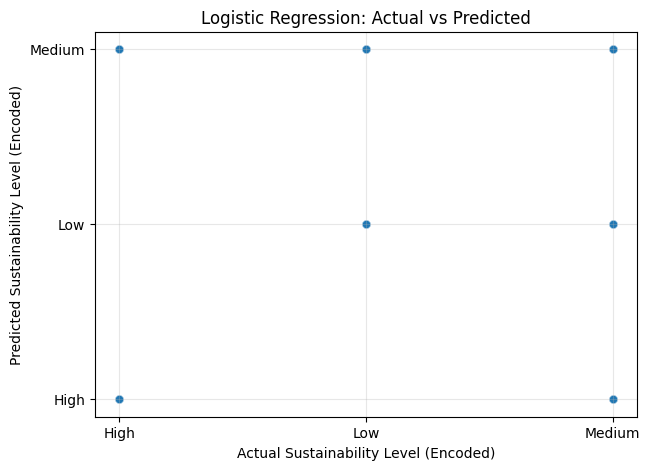

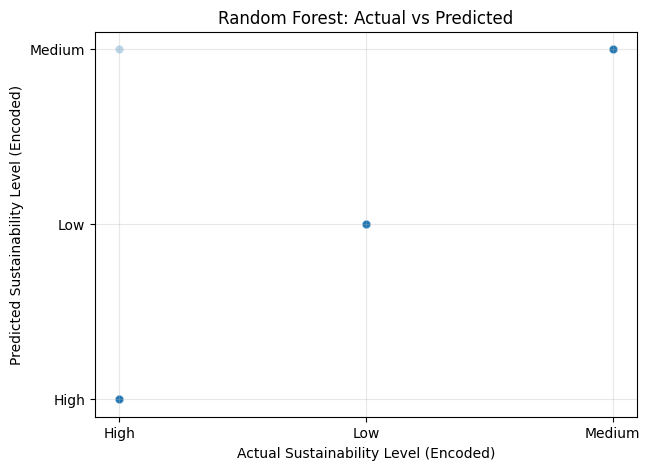

In [84]:
def actual_vs_pred(y_true, y_pred, title):
    plt.figure(figsize=(7,5))
    sns.scatterplot(x=y_true, y=y_pred, alpha=0.3)
    plt.xlabel("Actual Sustainability Level (Encoded)")
    plt.ylabel("Predicted Sustainability Level (Encoded)")
    plt.title(title)
    plt.xticks(ticks=[0, 1, 2], labels=le_target.classes_)
    plt.yticks(ticks=[0, 1, 2], labels=le_target.classes_)
    plt.grid(alpha=0.3)
    plt.show()

actual_vs_pred(y_test_final, y_pred_lr_final, "Logistic Regression: Actual vs Predicted")
actual_vs_pred(y_test_final, y_pred_rf_final, "Random Forest: Actual vs Predicted")

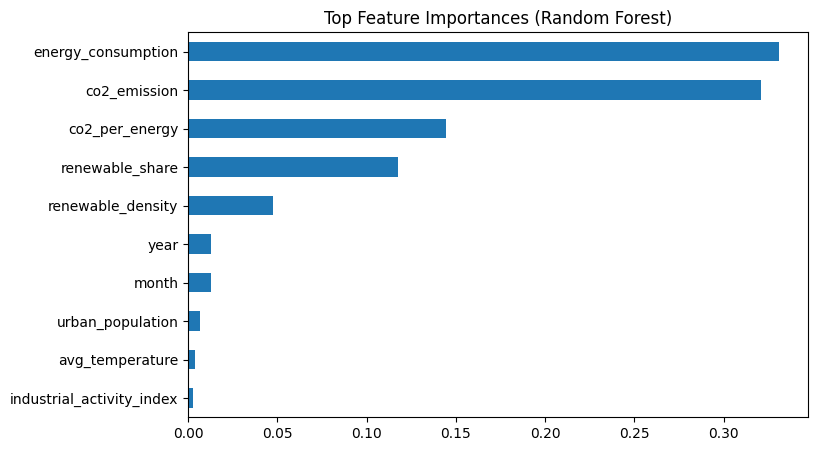

In [85]:
importances = rf_final.feature_importances_
features = X.columns # Ensure X has the correct columns from final_features

feat_imp = pd.Series(importances, index=features).sort_values(ascending=False)[:10]

plt.figure(figsize=(8,5))
feat_imp.plot(kind='barh')
plt.title("Top Feature Importances (Random Forest)")
plt.gca().invert_yaxis()
plt.show()

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

def residual_plot(y_true, y_pred, title):
    """
    Visualizes residuals (actual - predicted) against predicted values.

    Args:
        y_true (array-like): Actual target values.
        y_pred (array-like): Predicted target values.
        title (str): Title of the plot.
    """
    # 2. Calculate residuals
    residuals = y_true - y_pred

    plt.figure(figsize=(10, 6))

    # 3. Create a scatter plot
    sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)

    # 4. Set labels and title
    plt.xlabel('Predicted Values', fontweight='bold')
    plt.ylabel('Residuals (Actual - Predicted)', fontweight='bold')
    plt.title(f'Residual Plot: {title}', fontweight='bold', fontsize=14)

    # 5. Add a horizontal line at y=0
    plt.axhline(y=0, color='red', linestyle='--', linewidth=2)

    # 6. Add a grid
    plt.grid(True, linestyle='--', alpha=0.7)

    # 7. Display the plot
    plt.tight_layout()
    plt.show()

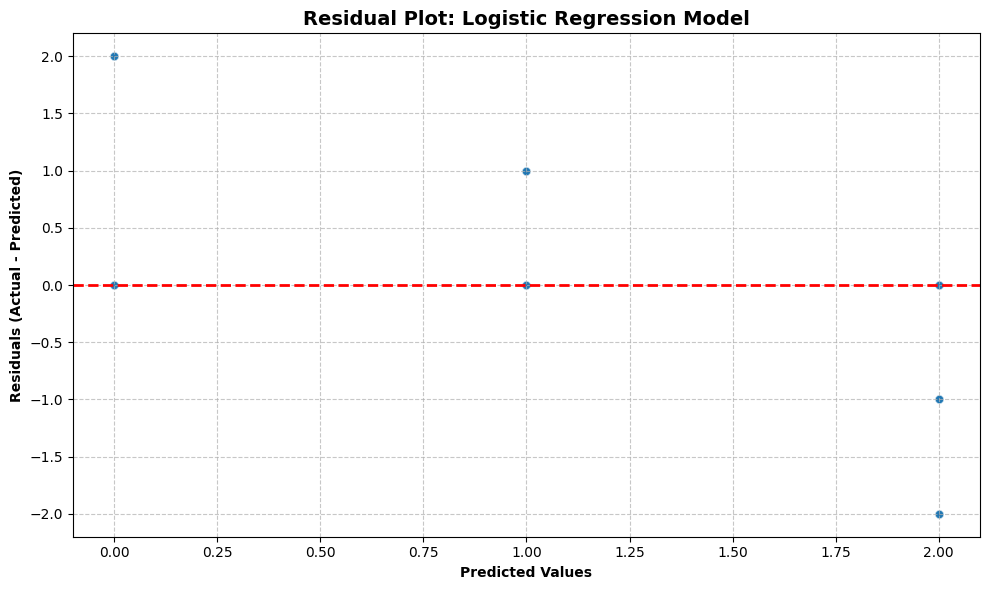

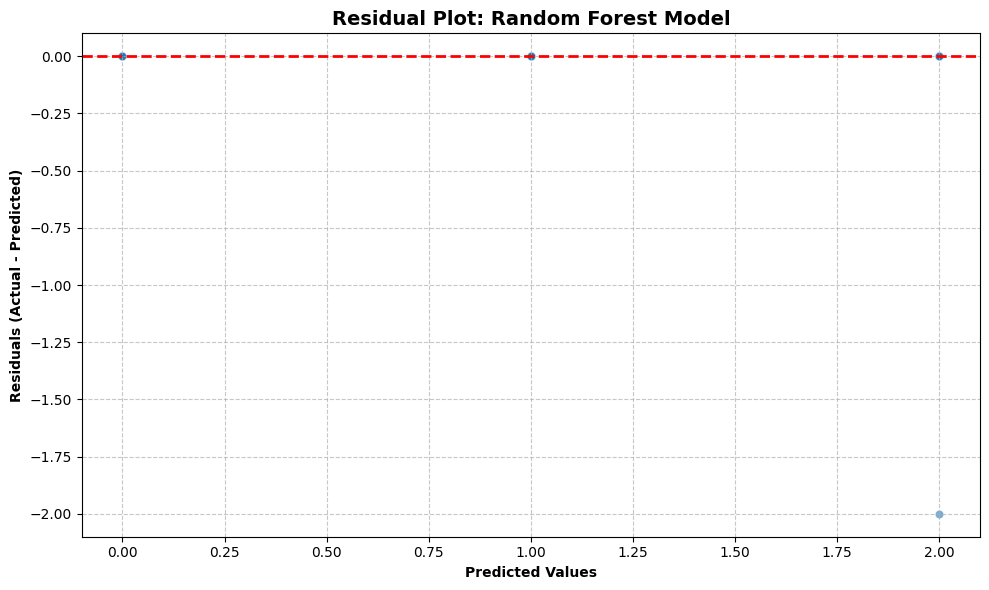

In [87]:
residual_plot(y_test_final, y_pred_lr_final, "Logistic Regression Model")
residual_plot(y_test_final, y_pred_rf_final, "Random Forest Model")

In [88]:
from sklearn.ensemble import GradientBoostingClassifier

print("FINAL MODEL 4: Gradient Boosting Classifier")

# 1. Instantiate GradientBoostingClassifier
gbc_final = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    random_state=42
)

# Cross-validation score
# Reuse the cv_strategy defined previously
gbc_cv_scores = cross_val_score(
    gbc_final, X_train_final_scaled, y_train_final,
    cv=cv_strategy, scoring='f1_macro', n_jobs=-1
)
gbc_cv_score = gbc_cv_scores.mean()

# 2. Fit the GradientBoostingClassifier model
gbc_final.fit(X_train_final_scaled, y_train_final)

# 3. Make predictions on the X_test_final_scaled data
y_pred_gb = gbc_final.predict(X_test_final_scaled)

# 4. Calculate and print performance metrics
gbc_final_acc = accuracy_score(y_test_final, y_pred_gb)
gbc_final_precision = precision_score(y_test_final, y_pred_gb, average='macro')
gbc_final_recall = recall_score(y_test_final, y_pred_gb, average='macro')
gbc_final_f1 = f1_score(y_test_final, y_pred_gb, average='macro')

print(f"  Features Used: {len(final_features)}")
print(f"  CV F1-Score: {gbc_cv_score:.4f}")
print(f"  Test Accuracy: {gbc_final_acc:.4f}")
print(f"  Test Precision: {gbc_final_precision:.4f}")
print(f"  Test Recall: {gbc_final_recall:.4f}")
print(f"  Test F1-Score: {gbc_final_f1:.4f}")
print()

# 5. Print a detailed classification_report
print("Classification Report (Gradient Boosting Classifier):")
print(classification_report(y_test_final, y_pred_gb, target_names=le_target.classes_, digits=4))

FINAL MODEL 4: Gradient Boosting Classifier
  Features Used: 10
  CV F1-Score: 0.9993
  Test Accuracy: 0.9996
  Test Precision: 0.9997
  Test Recall: 0.9997
  Test F1-Score: 0.9997

Classification Report (Gradient Boosting Classifier):
              precision    recall  f1-score   support

        High     1.0000    0.9990    0.9995      3004
         Low     1.0000    1.0000    1.0000       721
      Medium     0.9992    1.0000    0.9996      3595

    accuracy                         0.9996      7320
   macro avg     0.9997    0.9997    0.9997      7320
weighted avg     0.9996    0.9996    0.9996      7320



In [89]:
print("TASK 6: COMPARATIVE ANALYSIS - TABLE 4 (Updated with GBC)")

# Create comparison table
final_comparison = pd.DataFrame({
    'Model': [
        'Logistic Regression',
        'Random Forest',
        'K-Nearest Neighbors',
        'Gradient Boosting Classifier'
    ],
    'Features Used': [
        len(final_features),
        len(final_features),
        len(final_features),
        len(final_features)
    ],
    'CV F1-Score': [
        lr_cv_score,
        rf_cv_score,
        knn_cv_score,
        gbc_cv_score
    ],
    'Accuracy': [
        lr_final_acc,
        rf_final_acc,
        knn_final_acc,
        gbc_final_acc
    ],
    'Precision': [
        lr_final_precision,
        rf_final_precision,
        knn_final_precision,
        gbc_final_precision
    ],
    'Recall': [
        lr_final_recall,
        rf_final_recall,
        knn_final_recall,
        gbc_final_recall
    ],
    'F1-Score': [
        lr_final_f1,
        rf_final_f1,
        knn_final_f1,
        gbc_final_f1
    ]
})

print("TABLE 4: Comparison of Final Classification Models (Updated)")
print("-" * 80)
print(final_comparison.to_string(index=False))
print()

# Identify best model by F1-Score
best_final_idx = final_comparison['F1-Score'].idxmax()
best_final_model = final_comparison.loc[best_final_idx, 'Model']
best_final_f1 = final_comparison.loc[best_final_idx, 'F1-Score']

print(f"BEST FINAL MODEL: {best_final_model}")
print(f"   F1-Score: {best_final_f1:.4f}")
print()


TASK 6: COMPARATIVE ANALYSIS - TABLE 4 (Updated with GBC)
TABLE 4: Comparison of Final Classification Models (Updated)
--------------------------------------------------------------------------------
                       Model  Features Used  CV F1-Score  Accuracy  Precision   Recall  F1-Score
         Logistic Regression             10     0.882213  0.842350   0.868517 0.782385  0.809816
               Random Forest             10     0.998891  0.999863   0.999907 0.999889  0.999898
         K-Nearest Neighbors             10     0.879346  0.900410   0.900189 0.873442  0.885785
Gradient Boosting Classifier             10     0.999310  0.999590   0.999722 0.999667  0.999694

BEST FINAL MODEL: Random Forest
   F1-Score: 0.9999



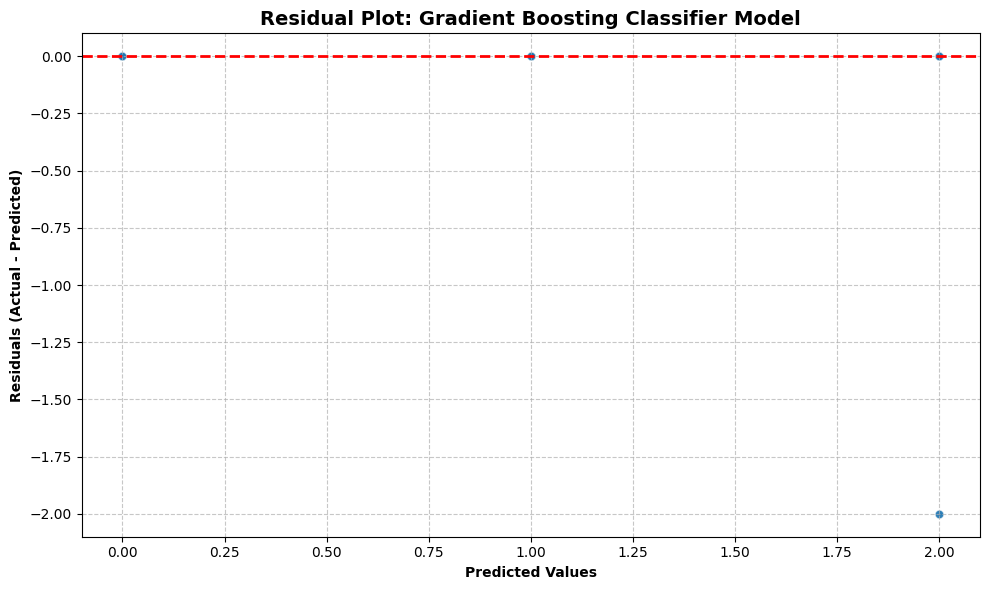

In [90]:
residual_plot(y_test_final, y_pred_gb, "Gradient Boosting Classifier Model")

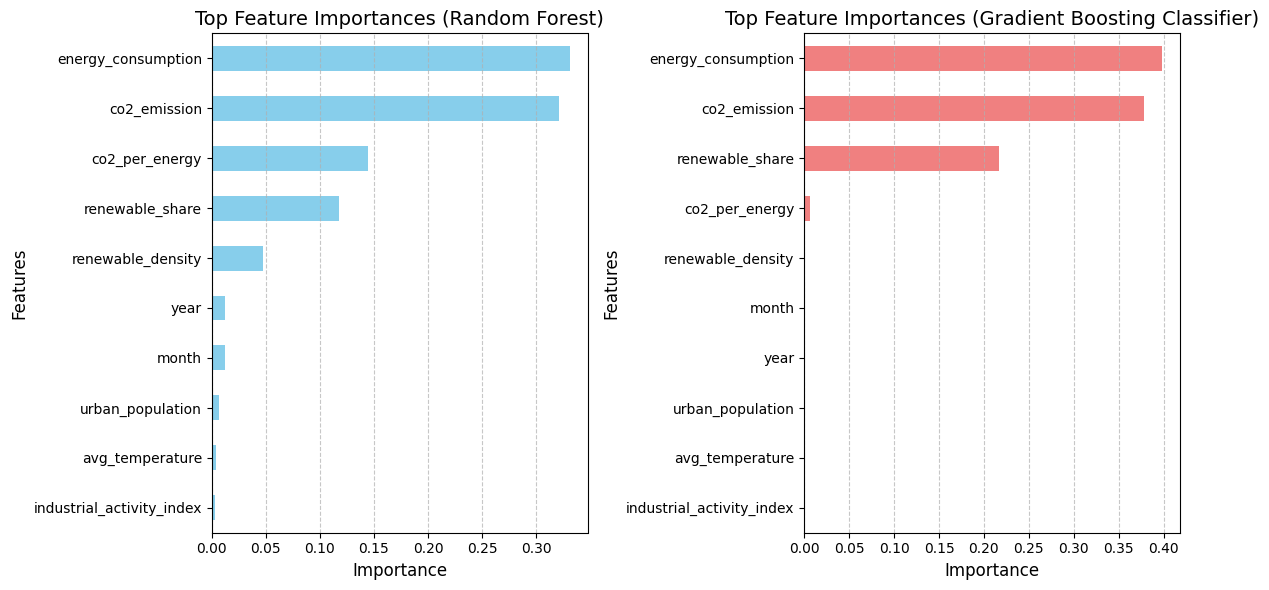

In [91]:
import matplotlib.pyplot as plt
import pandas as pd

# 1. Extract feature importances
rf_importances = rf_final.feature_importances_
gbc_importances = gbc_final.feature_importances_

# 2. Create and sort Pandas Series for each model
rf_feat_imp = pd.Series(rf_importances, index=final_features).sort_values(ascending=False)
gbc_feat_imp = pd.Series(gbc_importances, index=final_features).sort_values(ascending=False)

# 3. Create two horizontal bar plots for top 10 features
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1) # First subplot for Random Forest
rf_feat_imp.head(10).plot(kind='barh', color='skyblue')
plt.title("Top Feature Importances (Random Forest)", fontsize=14)
plt.xlabel("Importance", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.gca().invert_yaxis() # Invert y-axis for better readability
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.subplot(1, 2, 2) # Second subplot for Gradient Boosting Classifier
gbc_feat_imp.head(10).plot(kind='barh', color='lightcoral')
plt.title("Top Feature Importances (Gradient Boosting Classifier)", fontsize=14)
plt.xlabel("Importance", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.gca().invert_yaxis() # Invert y-axis for better readability
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

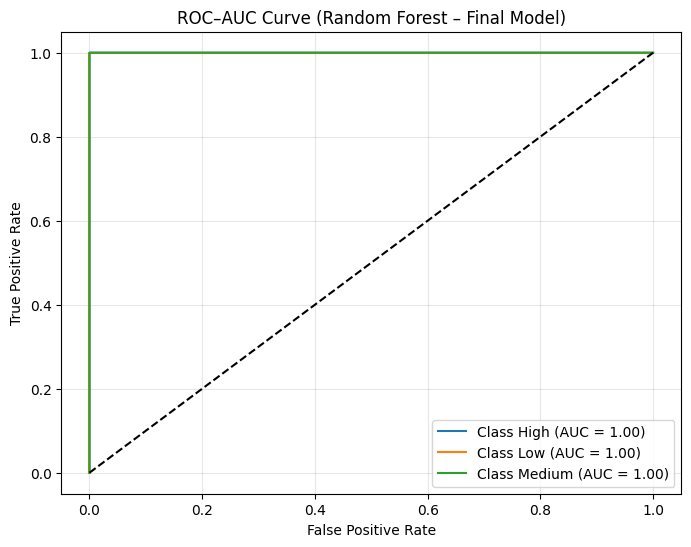

In [92]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Binarize the output
y_test_bin = label_binarize(y_test_final, classes=[0,1,2])
n_classes = y_test_bin.shape[1]

# Get predicted probabilities from final model (Random Forest)
y_score = rf_final.predict_proba(X_test_final_scaled)

plt.figure(figsize=(8,6))

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {le_target.classes_[i]} (AUC = {roc_auc:.2f})')

plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC–AUC Curve (Random Forest – Final Model)')
plt.legend()
plt.grid(alpha=0.3)
plt.show()
